#  Investigate - European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Q 1">Investigae first question  </a></li>
<li><a href="#Q 2">Investigae  second question  </a></li>
<li><a href="#Q 3">Investigae  thierd question  </a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

   
We will use European Soccer Database from Kaggle 
cover 11 European Leagues from 2008:2016 sessions to analsis 
the following  table  displays the dataset in  details


|  *Tables  names*     |  *NO.of rows*   | *NO.of columns*  |
|------------------|-------------|--------------|
|Country           | 11          |  2           |
|League            | 11          |  3           |
|Player            | 11.1k       |  7           |
|Player_Attributes | 184k        |  42          |
|Match             | 26,000      |  115         |
|Team              | 299         |  5           |
|Team_Attributes   | 1458        |  25          |
 

* I'm used col player_name  from the df "Player" to select mo salah id for   merging with df Player_Attributes to explore his performance

* I'm selecting the attributes of  only Spanish teams by inner join between the Spanish part of Team_df and  Team_Attributes_df 

* Spanish teams by inner join between the Spanish part of Team_df and  match  df 

 
 
 
  

### Questions  for Analysis
* ###  Investigate Mohamed's salah performance and career the ups and down if exists from 2008:2016 as the most Egyptian professional player all over  the Egyptian football history  we will explore his attributes to find which one increase or decrease in what time to relate it with the teams he played for it which one enhanced his performance and which do opposite. 

* ### what are the strongest teams in the Spanish league and the main characters' defense plying style or offensive style?   so we will dive the attributes into related styles explore the most important Spanish teams attributes to figure out the top ten strong teams 

* ### There is a reputation about the Spanish League that it lacks   competition and that the championship is always between Barcelona and Real Madrid, was it the case in the eight years of research? we will explore   the  Spanish teams goals and  total point per season we will  rank them and check the claim accuracy 

### Sir kindly notice that I installed 
### plotly-5.5.0 tenacity-8.0.1
### locally  to run two charts below

In [1]:
import numpy as np  
import pandas as pd  
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
%matplotlib inline
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 155)
pd.options.mode.chained_assignment = None  

<a id='wrangling'></a>
## Data Wrangling

### First, let's load all tables from database.sqlite and get familiar with it




In [2]:
connection = sqlite3.connect("database.sqlite")

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table'
                     """, connection)
tables.head(2)

type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...

In [3]:
players = pd.read_sql(''' SELECT * 
                          FROM Player
                      ''', connection)
players.head(2)

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146

In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


### stats about numeric attributes  

In [5]:
players["height"].describe()


count    11060.000000
mean       181.867445
std          6.369201
min        157.480000
25%        177.800000
50%        182.880000
75%        185.420000
max        208.280000
Name: height, dtype: float64

Text(0.5, 1.0, 'height Box plot')

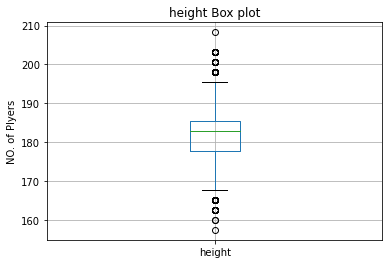

In [6]:
ax=players.boxplot("height")
#ax.set_xlabel("height")
ax.set_ylabel("NO. of Plyers")
ax.set_title("height Box plot")

perfect normal distrubioation

In [7]:
players["weight"].describe()

count    11060.000000
mean       168.380289
std         14.990217
min        117.000000
25%        159.000000
50%        168.000000
75%        179.000000
max        243.000000
Name: weight, dtype: float64

Text(0.5, 1.0, 'weight distrubtion')

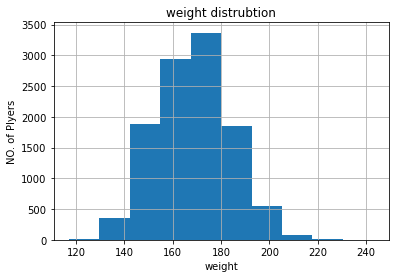

In [8]:
ax=players["weight"].hist(bins=10)
ax.set_xlabel("weight")
ax.set_ylabel("NO. of Plyers")
ax.set_title("weight distrubtion")


### as we notce that mean  and median in both coloumns  are close  this  normal distribution  for   height   and  maximum weight    is weight 110.223 kg let's explore the  heaviest plyer/s  and the tallest/s 

In [9]:
T=players["height"].sort_values( ).max()


In [10]:
players.query(f"height =={T}")

id  player_api_id       player_name  player_fifa_api_id  \
5901  5908         148325  Kristof van Hout              185306   

                 birthday  height  weight  
5901  1987-02-09 00:00:00  208.28     243

In [11]:
H=players["weight"].sort_values( ).max()

In [12]:
players.query(f"weight =={H}")

id  player_api_id       player_name  player_fifa_api_id  \
5901    5908         148325  Kristof van Hout              185306   
10297  10313          27313         Tim Wiese               53012   

                  birthday  height  weight  
5901   1987-02-09 00:00:00  208.28     243  
10297  1981-12-17 00:00:00  193.04     243

### note  the  weight in pounds 

In [13]:
Player_Attributes = pd.read_sql(''' SELECT * 
                          FROM Player_Attributes
                      ''', connection)
Player_Attributes.head(2)

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0       44.0              71.0           61.0     44.0       51.0   45.0   
1       44.0              71.0           61.0     44.0       51.0   45.0   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0                39.0          64.0          49.0          60.0          64.0   
1                39.0          64.0          49.0          60.0          64.0   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
1     59.0       47.0     65.0        55.0     58.0     54.0      76.0   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0        35.0        71.0           70.0         45.0    54.0       48.0   
1        35.0        71.0           70.0         45.0    54.0       48.0   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0     65.0             69.0            69.0        6.0         11.0   
1     65.0             69.0            69.0        6.0         11.0   

   gk_kicking  gk_positioning  gk_reflexes  
0        10.0             8.0          8.0  
1        10.0             8.0          8.0

#### too meny null but we intrest just in mo salah requred 

In [14]:
Player_Attributes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

### all numeric columns in Player Attributes df is a float which is the appropriate data type

In [15]:

dis_patt = Player_Attributes.iloc[:,np.r_[4,5, 9 :42] ].describe()
dis_patt.iloc[np.r_[1,3,4,5,6,7] , :] 


overall_rating  potential   crossing  finishing  heading_accuracy  \
mean       68.600015  73.460353  55.086883  49.921078         57.266023   
min        33.000000  39.000000   1.000000   1.000000          1.000000   
25%        64.000000  69.000000  45.000000  34.000000         49.000000   
50%        69.000000  74.000000  59.000000  53.000000         60.000000   
75%        73.000000  78.000000  68.000000  65.000000         68.000000   
max        94.000000  97.000000  95.000000  97.000000         98.000000   

      short_passing    volleys  dribbling      curve  free_kick_accuracy  \
mean      62.429672  49.468436  59.175154  52.965675            49.38095   
min        3.000000   1.000000   1.000000   2.000000             1.00000   
25%       57.000000  35.000000  52.000000  41.000000            36.00000   
50%       65.000000  52.000000  64.000000  56.000000            50.00000   
75%       72.000000  64.000000  72.000000  67.000000            63.00000   
max       97.000000  93.000000  97.000000  94.000000            97.00000   

      long_passing  ball_control  acceleration  sprint_speed   agility  \
mean      57.06988     63.388879     67.659357     68.051244  65.97091   
min        3.00000      5.000000     10.000000     12.000000  11.00000   
25%       49.00000     58.000000     61.000000     62.000000  58.00000   
50%       59.00000     67.000000     69.000000     69.000000  68.00000   
75%       67.00000     73.000000     77.000000     77.000000  75.00000   
max       97.00000     97.000000     97.000000     97.000000  96.00000   

      reactions    balance  shot_power    jumping    stamina   strength  \
mean  66.103706  65.189496   61.808427  66.969045  67.038544  67.424529   
min   17.000000  12.000000    2.000000  14.000000  10.000000  10.000000   
25%   61.000000  58.000000   54.000000  60.000000  61.000000  60.000000   
50%   67.000000  67.000000   65.000000  68.000000  69.000000  69.000000   
75%   72.000000  74.000000   73.000000  74.000000  76.000000  76.000000   
max   96.000000  96.000000   97.000000  96.000000  96.000000  96.000000   

      long_shots  aggression  interceptions  positioning    vision  penalties  \
mean   53.339431   60.948046      52.009271    55.786504  57.87355  55.003986   
min     1.000000    6.000000       1.000000     2.000000   1.00000   2.000000   
25%    41.000000   51.000000      34.000000    45.000000  49.00000  45.000000   
50%    58.000000   64.000000      57.000000    60.000000  60.00000  57.000000   
75%    67.000000   73.000000      68.000000    69.000000  69.00000  67.000000   
max    96.000000   97.000000      96.000000    96.000000  97.00000  96.000000   

        marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
mean  46.772242        50.351257       48.001462  14.704393    16.063612   
min    1.000000         1.000000        2.000000   1.000000     1.000000   
25%   25.000000        29.000000       25.000000   7.000000     8.000000   
50%   50.000000        56.000000       53.000000  10.000000    11.000000   
75%   66.000000        69.000000       67.000000  13.000000    15.000000   
max   96.000000        95.000000       95.000000  94.000000    93.000000   

      gk_kicking  gk_positioning  gk_reflexes  
mean   20.998362       16.132154    16.441439  
min     1.000000        1.000000     1.000000  
25%     8.000000        8.000000     8.000000  
50%    12.000000       11.000000    11.000000  
75%    15.000000       15.000000    15.000000  
max    97.000000       96.000000    96.000000

In [16]:
Team_df = pd.read_sql(''' SELECT * 
                          FROM Team
                      ''', connection)
Team_df.head(2)


id  team_api_id  team_fifa_api_id team_long_name team_short_name
0   1         9987             673.0       KRC Genk             GEN
1   2         9993             675.0   Beerschot AC             BAC

In [17]:
Team_df.info() #team_fifa_api_id null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [18]:
Team_Attributes_df = pd.read_sql(''' SELECT * 
                          FROM Team_Attributes
                      ''', connection)
Team_Attributes_df.head(2) 

id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   

   buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  \
0                  50                   Mixed                   Organised   
1                  56                   Mixed                   Organised   

   chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing  \
0                     60                     Normal                      65   
1                     54                     Normal                      63   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                      55   
1                      Normal                      64   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                      Normal                      Organised               50   
1                      Normal                      Organised               47   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0               Medium                 55                  Press   
1               Medium                 44                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0                45                Normal                    Cover  
1                54                Normal                    Cover

In [19]:
Team_Attributes_df.info()  #buildUpPlayDribbling null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [20]:

Team_Attributes_df.iloc[: ,np.r_ [4,7,10,12,14,17,19,21]]


buildUpPlaySpeed buildUpPlayDribblingClass buildUpPlayPositioningClass  \
0                   60                    Little                   Organised   
1                   52                    Normal                   Organised   
2                   47                    Normal                   Organised   
3                   70                    Little                   Organised   
4                   47                    Little                   Organised   
...                ...                       ...                         ...   
1453                52                    Little                   Organised   
1454                54                    Little                   Organised   
1455                54                    Little                   Organised   
1456                54                    Normal                   Organised   
1457                54                    Normal                   Organised   

     chanceCreationPassingClass chanceCreationCrossingClass  \
0                        Normal                      Normal   
1                        Normal                      Normal   
2                        Normal                      Normal   
3                         Risky                        Lots   
4                        Normal                      Normal   
...                         ...                         ...   
1453                     Normal                      Normal   
1454                     Normal                      Normal   
1455                     Normal                      Normal   
1456                     Normal                      Normal   
1457                     Normal                      Normal   

     chanceCreationPositioningClass defencePressureClass  \
0                         Organised               Medium   
1                         Organised               Medium   
2                         Organised               Medium   
3                         Organised               Medium   
4                         Organised               Medium   
...                             ...                  ...   
1453                      Organised               Medium   
1454                      Organised               Medium   
1455                      Organised               Medium   
1456                      Organised               Medium   
1457                      Organised               Medium   

     defenceAggressionClass  
0                     Press  
1                     Press  
2                     Press  
3                    Double  
4                     Press  
...                     ...  
1453                  Press  
1454                  Press  
1455                  Press  
1456                  Press  
1457                  Press  

[1458 rows x 8 columns]

In [21]:
match_df = pd.read_sql(''' SELECT * 
                          FROM Match
                      ''', connection)
match_df.head(2)

id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
0        492473              9987              9993               1   
1        492474             10000              9994               0   

   away_team_goal  home_player_X1  home_player_X2  home_player_X3  \
0               1             NaN             NaN             NaN   
1               0             NaN             NaN             NaN   

   home_player_X4  home_player_X5  home_player_X6  home_player_X7  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   home_player_X8  home_player_X9  home_player_X10  home_player_X11  \
0             NaN             NaN              NaN              NaN   
1             NaN             NaN              NaN              NaN   

   away_player_X1  away_player_X2  away_player_X3  away_player_X4  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   away_player_X5  away_player_X6  away_player_X7  away_player_X8  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   away_player_X9  away_player_X10  away_player_X11  home_player_Y1  \
0             NaN              NaN              NaN             NaN   
1             NaN              NaN              NaN             NaN   

   home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  \
0              NaN              NaN             NaN             NaN   
1              NaN              NaN             NaN             NaN   

   away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  \
0             NaN             NaN             NaN              NaN   
1             NaN             NaN             NaN              NaN   

   away_player_Y11  home_player_1  home_player_2  home_player_3  \
0              NaN            NaN            NaN            NaN   
1              NaN            NaN            NaN            NaN   

   home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   

   home_player_9  home_player_10  home_player_11  away_player_1  \
0            NaN             NaN             NaN            NaN   
1            NaN             NaN             NaN            NaN   

   away_player_2  away_player_3  away_player_4  away_player_5  away_player_6  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   

   away_player_7  away_player_8  away_player_9  away_player_10  \
0            NaN            NaN            NaN             NaN   
1            NaN            NaN            NaN             NaN   

   away_player_11  goal shoton shotoff foulcommit  card cross corner  \
0             NaN  None   None    None       None  None  None   None   
1             NaN  None   None    Non

In [22]:
match_df.info(verbose=True, show_counts=True  ) # too meny null bute we will not use them
#match_df.iloc[:,np.r_[5,3, 9,10 ] ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24

### we ignored buildUpPlayDribbling will droped it later

In [23]:
 match_df.iloc[:,np.r_[5,3, 9,10 ] ].describe()


home_team_goal  away_team_goal
count    25979.000000    25979.000000
mean         1.544594        1.160938
std          1.297158        1.142110
min          0.000000        0.000000
25%          1.000000        0.000000
50%          1.000000        1.000000
75%          2.000000        2.000000
max         10.000000        9.000000

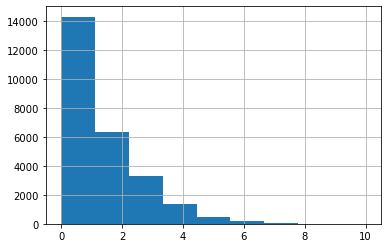

In [24]:
match_df["home_team_goal"].hist(bins=9);
# ax=players["weight"].hist()
# ax.set_xlabel("weight")
# ax.set_ylabel("NO. of Plyers")
# ax.set_title("weight distrubtion")


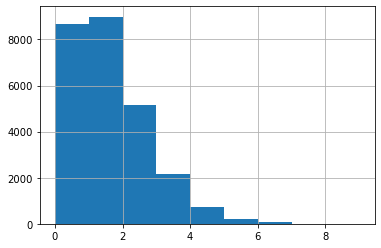

In [25]:
match_df["away_team_goal"].hist(bins=9);

###  of course, the 2 charts show  strong  right-skewed   which more values are concentrated on the lift    side of the distribution graph while the ri9ght tail of the distribution graph is longer in our case   and for any football ((soccer)) fan it's normal that almost matches end with a few goals or even without a goal at all min =0 

## let's drop all columns which 40% of them had a nulls value 

In [26]:
#define the function 
     
def drop_forty_null_column(df):
    """ drop any columns contain 40% or more  of null values  
        Args:  df - pandas DataFrame
        return  the modified df  - pandas DataFrame
     """
    
    col_list = df.columns
    while True:
        for col in col_list :
            if (df[col].isnull().sum()/len(df)) >= 0.4 :

                df.drop(columns=[col],inplace =True )
            else :
                continue


        return df

In [27]:
Team_Attributes_df.shape

(1458, 25)

In [28]:
drop_forty_null_column(Team_Attributes_df)
Team_Attributes_df.shape   # drop buildUpPlayDribbling col 

(1458, 24)

In [29]:
match_df.shape

(25979, 115)

In [30]:
drop_forty_null_column(match_df)
match_df.shape   # alots of cols in this DF  have 40%  or more of null values

(25979, 98)

***

<a id='Q 1'></a>
## First question


## Data Cleaning
### merge player and player_att to creat a new df contains the player names and attributes

In [31]:
Player_Att_numric=Player_Attributes.iloc[:,np.r_[2,3,4,5, 9 :42] ]
merged_plyerName_plyerAtt = players.merge(Player_Att_numric, on="player_api_id",suffixes =("_name","_att"))


### select  mohamed salah  records by mask

**let's chek mo' salah df for nulls values** 

In [32]:
mo_salah_df=merged_plyerName_plyerAtt[merged_plyerName_plyerAtt["player_name"]== "Mohamed Salah"]
# lets chik if  any null values !
mo_salah_df.isnull().values.any()
mo_salah_df.duplicated().sum()

0

In [33]:
mo_salah_df.duplicated().sum()

0

### Great no null values  or dupliate values found 

In [34]:
# let's have adeepr look of mo's atributes 
mo_salah_explor_df =mo_salah_df.iloc[: , np.r_ [8:40 ]]

## Exploratory Data Analysis for first question

<Figure size 2160x2700 with 0 Axes>

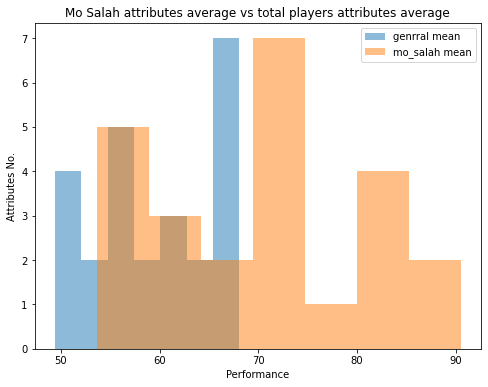

In [35]:
plt.figure(figsize=(12,15), dpi= 180)
mo_mean=mo_salah_df.iloc[:,np.r_[ 9 :33] ].mean() 
total_mean =Player_Attributes.iloc[:,np.r_[ 9 :34] ].mean()
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(total_mean, alpha=0.5, label='genrral mean', bins =7)
ax.hist(mo_mean, alpha=0.5, label='mo_salah mean',bins =7)
ax.set_title("Mo Salah attributes average vs total players attributes average")
ax.set_xlabel('Performance')
ax.set_ylabel('Attributes No.')
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1,1))
plt.show();


###   The mo's average is clearly much bigger than the main average

In [36]:
# let's have adeepr look of mo's atributes 
mo_salah_explor_df =mo_salah_df.iloc[: , np.r_ [7:33 ]]

In [37]:
mo_salah_explor_df

date  overall_rating  potential  crossing  finishing  \
128023  2016-05-05 00:00:00            80.0       85.0      68.0       77.0   
128024  2016-04-21 00:00:00            80.0       85.0      68.0       77.0   
128025  2015-12-17 00:00:00            80.0       85.0      68.0       77.0   
128026  2015-11-12 00:00:00            80.0       85.0      68.0       77.0   
128027  2015-10-09 00:00:00            80.0       87.0      68.0       77.0   
128028  2015-09-21 00:00:00            80.0       87.0      68.0       77.0   
128029  2015-07-03 00:00:00            77.0       84.0      67.0       76.0   
128030  2015-04-24 00:00:00            77.0       84.0      67.0       76.0   
128031  2015-03-20 00:00:00            76.0       84.0      67.0       74.0   
128032  2015-03-13 00:00:00            76.0       84.0      67.0       74.0   
128033  2015-03-06 00:00:00            76.0       84.0      67.0       68.0   
128034  2015-02-06 00:00:00            76.0       84.0      67.0       68.0   
128035  2014-09-18 00:00:00            76.0       84.0      67.0       68.0   
128036  2014-05-16 00:00:00            77.0       87.0      65.0       68.0   
128037  2014-01-31 00:00:00            77.0       87.0      65.0       68.0   
128038  2014-01-10 00:00:00            75.0       86.0      61.0       68.0   
128039  2013-12-13 00:00:00            75.0       85.0      61.0       68.0   
128040  2013-11-01 00:00:00            75.0       85.0      61.0       68.0   
128041  2013-10-04 00:00:00            75.0       85.0      61.0       68.0   
128042  2013-09-20 00:00:00            74.0       85.0      61.0       67.0   
128043  2013-03-22 00:00:00            73.0       82.0      61.0       66.0   
128044  2013-03-08 00:00:00            73.0       82.0      61.0       66.0   
128045  2013-02-15 00:00:00            70.0       82.0      61.0       66.0   
128046  2012-08-31 00:00:00            70.0       82.0      61.0       66.0   
128047  2007-02-22 00:00:00            70.0       82.0      61.0       66.0   

        heading_accuracy  short_passing  volleys  dribbling  curve  \
128023              59.0           75.0     69.0       86.0   59.0   
128024              59.0           75.0     69.0       86.0   59.0   
128025              59.0           75.0     69.0       86.0   64.0   
128026              59.0           75.0     69.0       86.0   64.0   
128027              59.0           75.0     69.0       86.0   64.0   
128028              59.0           75.0     69.0       86.0   64.0   
128029              58.0           74.0     68.0       85.0   63.0   
128030              58.0           74.0     68.0       85.0   63.0   
128031              58.0           74.0     68.0       85.0   63.0   
128032              58.0           74.0     68.0       85.0   63.0   
128033              58.0           74.0     60.0       85.0   63.0   
128034              58.0           74.0     48.0       85.0   63.0   
128035              58.0           74.0     48.0       85.0   63.0   
128036              58.0           74.0     48.0       86.0   63.0   
128037              58.0           74.0     48.0       86.0   63.0   
128038              58.0           74.0     48.0       82.0   63.0   
128039              58.0           74.0     48.0       82.0   63.0   
128040              48.0           74.0     48.0       82.0   63.0   
128041              48.0           74.0     48.0       82.0   63.0   
128042              48.0           74.0     48.0       82.0   63.0   
128043              48.0           74.0     46.0       82.0   56.0   
128044              48.0           74.0     46.0       82.0   56.0   
128045              48.0           74.0     46.0       79.0   56.0   
128046              48.0           74.0     46.0       79.0   56.0   
128047              48.0           74.0     46.0       79.0   56.0   

        free_kick_accuracy  long_passing  ball_control  acceleration  \
128023                60.0          63.0          86.0          92.0   
128

In [38]:
mo_salah_explor_df.describe()


overall_rating  potential   crossing  finishing  heading_accuracy  \
count       25.000000  25.000000  25.000000  25.000000         25.000000   
mean        75.920000  84.480000  64.680000  70.840000         55.040000   
std          3.121431   1.610383   3.158586   4.588754          4.945368   
min         70.000000  82.000000  61.000000  66.000000         48.000000   
25%         75.000000  84.000000  61.000000  68.000000         48.000000   
50%         76.000000  85.000000  67.000000  68.000000         58.000000   
75%         77.000000  85.000000  67.000000  76.000000         58.000000   
max         80.000000  87.000000  68.000000  77.000000         59.000000   

       short_passing    volleys  dribbling      curve  free_kick_accuracy  \
count       25.00000  25.000000  25.000000  25.000000           25.000000   
mean        74.24000  56.320000  83.760000  61.440000           65.000000   
std          0.43589  10.566141   2.420055   3.028751            3.662877   
min         74.00000  46.000000  79.000000  56.000000           59.000000   
25%         74.00000  48.000000  82.000000  59.000000           60.000000   
50%         74.00000  48.000000  85.000000  63.000000           67.000000   
75%         74.00000  68.000000  86.000000  63.000000           67.000000   
max         75.00000  69.000000  86.000000  64.000000           68.000000   

       long_passing  ball_control  acceleration  sprint_speed    agility  \
count     25.000000      25.00000     25.000000     25.000000  25.000000   
mean      63.680000      82.60000     89.720000     90.480000  81.400000   
std        2.911472       6.22495      5.608921      4.331282   5.937171   
min       60.000000      68.00000     75.000000     81.000000  73.000000   
25%       61.000000      81.00000     92.000000     91.000000  73.000000   
50%       66.000000      86.00000     92.000000     91.000000  86.000000   
75%       66.000000      86.00000     92.000000     94.000000  86.000000   
max       67.000000      89.00000     92.000000     94.000000  86.000000   

       reactions    balance  shot_power  jumping    stamina   strength  \
count  25.000000  25.000000   25.000000     25.0  25.000000  25.000000   
mean   70.680000  73.480000   71.280000     70.0  76.000000  58.360000   
std     3.508561  12.576831    3.702702      0.0   2.041241   1.680278   
min    68.000000  54.000000   66.000000     70.0  72.000000  56.000000   
25%    68.000000  60.000000   68.000000     70.0  77.000000  56.000000   
50%    69.000000  80.000000   74.000000     70.0  77.000000  59.000000   
75%    74.000000  84.000000   74.000000     70.0  77.000000  60.000000   
max    80.000000  84.000000   75.000000     70.0  77.000000  60.000000   

       long_shots  aggression  interceptions  positioning  
count      25.000   25.000000      25.000000    25.000000  
mean       53.640   61.680000      57.520000    74.080000  
std         4.999    0.852447       1.981582     2.039608  
min        50.000   61.000000      54.000000    71.000000  
25%        50.000   61.000000      55.000000    73.000000  
50%        51.000   61.000000      59.000000    73.000000  
75%        60.000   62.000000      59.000000    76.000000  
max        61.000   63.000000      59.000000    77.000000

### from the recoreds  we can find tremendous  improvements    in mo's performance   max-min the important attributes  which had a strong impact on his overall  rating are :-          finishing ,  heading_accuracy  , volleys  ,  ball_control  , acceleration   ,sprint_speed   ,  agility , reactions , balance


In [39]:
mo_df =mo_salah_df.iloc[: , np.r_[7,8,11,12,14,19,20,21,22,23,24]] 
mo_df.head(34)

date  overall_rating  finishing  heading_accuracy  \
128023  2016-05-05 00:00:00            80.0       77.0              59.0   
128024  2016-04-21 00:00:00            80.0       77.0              59.0   
128025  2015-12-17 00:00:00            80.0       77.0              59.0   
128026  2015-11-12 00:00:00            80.0       77.0              59.0   
128027  2015-10-09 00:00:00            80.0       77.0              59.0   
128028  2015-09-21 00:00:00            80.0       77.0              59.0   
128029  2015-07-03 00:00:00            77.0       76.0              58.0   
128030  2015-04-24 00:00:00            77.0       76.0              58.0   
128031  2015-03-20 00:00:00            76.0       74.0              58.0   
128032  2015-03-13 00:00:00            76.0       74.0              58.0   
128033  2015-03-06 00:00:00            76.0       68.0              58.0   
128034  2015-02-06 00:00:00            76.0       68.0              58.0   
128035  2014-09-18 00:00:00            76.0       68.0              58.0   
128036  2014-05-16 00:00:00            77.0       68.0              58.0   
128037  2014-01-31 00:00:00            77.0       68.0              58.0   
128038  2014-01-10 00:00:00            75.0       68.0              58.0   
128039  2013-12-13 00:00:00            75.0       68.0              58.0   
128040  2013-11-01 00:00:00            75.0       68.0              48.0   
128041  2013-10-04 00:00:00            75.0       68.0              48.0   
128042  2013-09-20 00:00:00            74.0       67.0              48.0   
128043  2013-03-22 00:00:00            73.0       66.0              48.0   
128044  2013-03-08 00:00:00            73.0       66.0              48.0   
128045  2013-02-15 00:00:00            70.0       66.0              48.0   
128046  2012-08-31 00:00:00            70.0       66.0              48.0   
128047  2007-02-22 00:00:00            70.0       66.0              48.0   

        volleys  ball_control  acceleration  sprint_speed  agility  reactions  \
128023     69.0          86.0          92.0          91.0     86.0       80.0   
128024     69.0          86.0          92.0          91.0     86.0       75.0   
128025     69.0          86.0          92.0          91.0     86.0       75.0   
128026     69.0          86.0          92.0          91.0     86.0       75.0   
128027     69.0          86.0          92.0          91.0     86.0       75.0   
128028     69.0          86.0          92.0          91.0     86.0       75.0   
128029     68.0          85.0          92.0          94.0     86.0       74.0   
128030     68.0          85.0          92.0          94.0     86.0       74.0   
128031     68.0          81.0          92.0          94.0     86.0       70.0   
128032     68.0          81.0          92.0          94.0     86.0       70.0   
128033     60.0          81.0          92.0          94.0     86.0       70.0   
128034     48.0          81.0          92.0          94.0     86.0       69.0   
128035     48.0          81.0          92.0          94.0     86.0       69.0   
128036     48.0          89.0          92.0          94.0     86.0       68.0   
128037     48.0          89.0          92.0          94.0     86.0       68.0   
128038     48.0          87.0          92.0          93.0     78.0       68.0   
128039     48.0          87.0          92.0          91.0     78.0       68.0   
128040     48.0          87.0          92.0          91.0     78.0       68.0   
128041     48.0          87.0          92.0          91.0     73.0       68.0   
128042     48.0          86.0          92.0          91.0     73.0       68.0   
128043     46.0          79.0          89.0          85.0     73.0       68.0   
128044     46.0          79.0          89.0          85.0     73.0       68.0   
128045     46.0          68.0          75.0          81.0     73.0       68.0   
128046     46.0          68.0          75.0          81.0     73.0       68.0   
128047     46.0      

In [40]:
mo_df.describe()

overall_rating  finishing  heading_accuracy    volleys  ball_control  \
count       25.000000  25.000000         25.000000  25.000000      25.00000   
mean        75.920000  70.840000         55.040000  56.320000      82.60000   
std          3.121431   4.588754          4.945368  10.566141       6.22495   
min         70.000000  66.000000         48.000000  46.000000      68.00000   
25%         75.000000  68.000000         48.000000  48.000000      81.00000   
50%         76.000000  68.000000         58.000000  48.000000      86.00000   
75%         77.000000  76.000000         58.000000  68.000000      86.00000   
max         80.000000  77.000000         59.000000  69.000000      89.00000   

       acceleration  sprint_speed    agility  reactions    balance  
count     25.000000     25.000000  25.000000  25.000000  25.000000  
mean      89.720000     90.480000  81.400000  70.680000  73.480000  
std        5.608921      4.331282   5.937171   3.508561  12.576831  
min       75.000000     81.000000  73.000000  68.000000  54.000000  
25%       92.000000     91.000000  73.000000  68.000000  60.000000  
50%       92.000000     91.000000  86.000000  69.000000  80.000000  
75%       92.000000     94.000000  86.000000  74.000000  84.000000  
max       92.000000     94.000000  86.000000  80.000000  84.000000

### as we notice that all atributs's 
## median is > mean 
### which  indecate to  left  SKEWED negative 
### let's explore  a few single attributes alone to  be sure  from our conclusion

<Figure size 1080x1080 with 0 Axes>

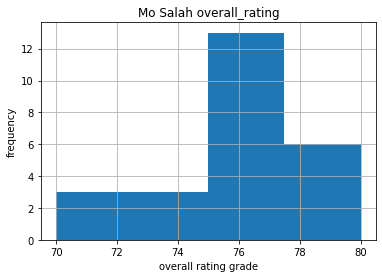

In [41]:
plt.figure(figsize=(6,6), dpi= 180) 
fig, ax = plt.subplots();
mo_df.overall_rating.hist(bins=4);
ax.set_title("Mo Salah overall_rating")
ax.set_ylabel('frequency')
ax.set_xlabel('overall rating grade');

### **As we know left-skewed  type of distribution in which more values are concentrated on the right (tail) side of the distribution graph while the left tail of the distribution graph is longer in our case indicate to  very good improvement mo" Salah performance**

<Figure size 1080x1080 with 0 Axes>

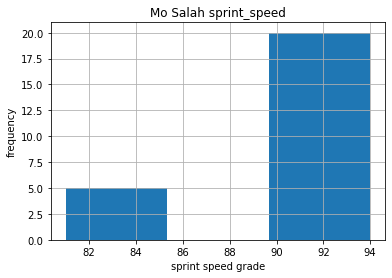

In [42]:
plt.figure(figsize=(6,6), dpi= 180) 
fig, ax = plt.subplots();
mo_df.sprint_speed.hist(bins=3);
ax.set_title("Mo Salah sprint_speed")
ax.set_ylabel('frequency')
ax.set_xlabel('sprint speed grade');

### almost over 90 % which reflect  one of main mo's character as aplyer

<Figure size 1080x1080 with 0 Axes>

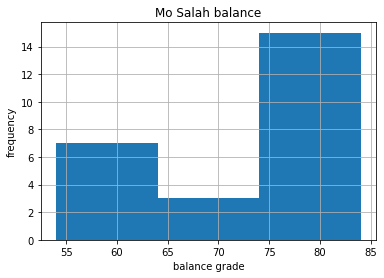

In [43]:
plt.figure(figsize=(6,6), dpi= 180) 
fig, ax = plt.subplots();
mo_df.balance.hist(bins=3);
ax.set_title("Mo Salah balance")
ax.set_ylabel('frequency')
ax.set_xlabel('balance grade');

### parsing the date column  from string to date
### then use it to sort mo's records ascendingly

In [44]:
mo_df["date"]=pd.to_datetime(mo_df["date"])
mo_df =mo_df.sort_values(by=['date'], ascending=True)

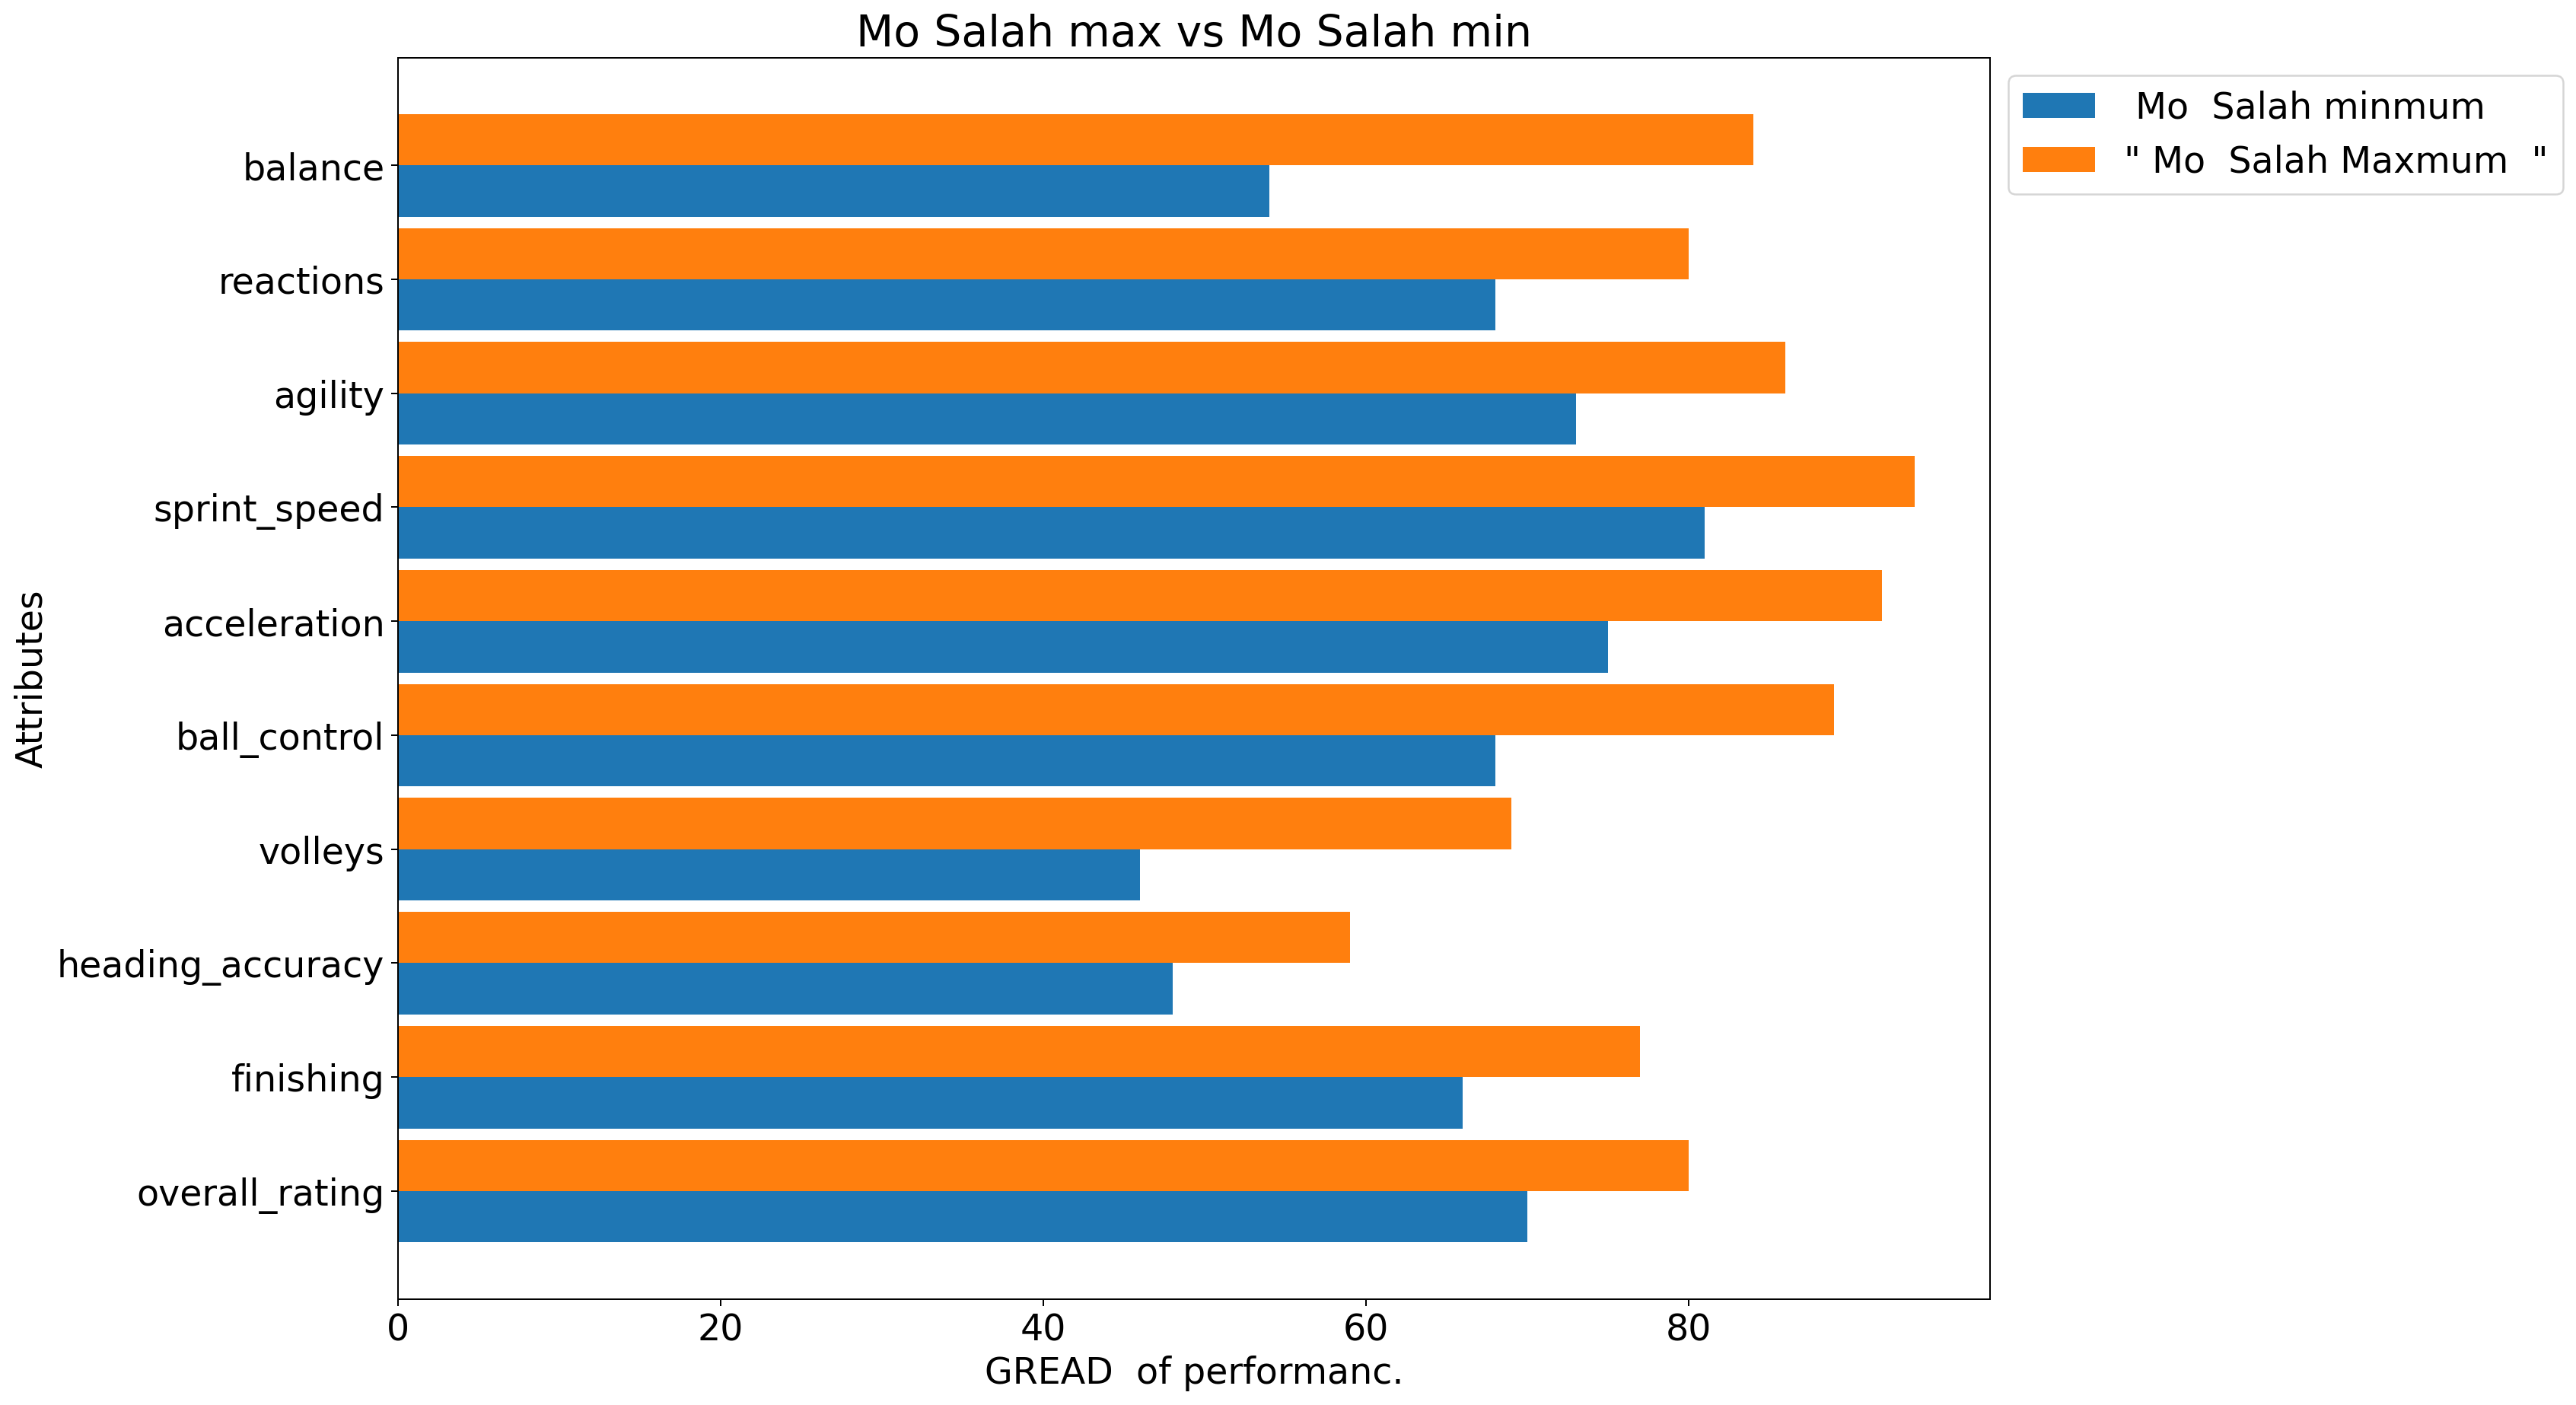

In [45]:
plt.rcParams.update({'font.size': 19})
cols_names =mo_df.columns[1:]
x = np.arange(len(cols_names))   
bar_size = 0.45    
#plot the chart
fig, ax = plt.subplots(figsize =(15,12), dpi= 180)
ax.barh(x - bar_size/2,mo_df.min().tolist()[1:], bar_size, label= " Mo  Salah minmum  " )
ax.barh(x + bar_size/2, mo_df.max().tolist()[1:], bar_size, label='" Mo  Salah Maxmum  "')

# formating the chart.
ax.set_title("Mo Salah max vs Mo Salah min")
ax.set_ylabel('Attributes')
ax.set_xlabel('GREAD  of performanc.'   )
ax.legend(loc='upper right')
plt.yticks(x ,cols_names)
ax.legend(bbox_to_anchor=(1,1))
ax.set_label(cols_names)
plt.show()

### defenltly we witnce an  increase in all atributes 

In [46]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,20), dpi= 180);
fig = px.histogram(data_frame=mo_df , x ="date" ,y = "overall_rating" ,nbins=32 
     , hover_data =mo_df ,title = "Mohammaed's Salah  cumulative overall rating",
       cumulative =True ,text_auto =True ,marginal ='box' );


fig.show();

<Figure size 3600x3600 with 0 Axes>

### from his journey start as a professional we notice continuous incremental in his attributes but in corrugated way lets see every year  

In [47]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,20), dpi= 180);
fig = px.histogram(data_frame=mo_df , x ="date" ,y = "overall_rating" ,nbins=16 
     , hover_data =mo_df ,title = "Mohammaed's Salah  cumulative overall rating",
       cumulative =False ,text_auto =True ,marginal ='box' );


fig.show();

<Figure size 3600x3600 with 0 Axes>

###  First  for the hist part :- the increase in mo's  performance in 2013 then down in 2014 tyhen incres agian strongly

### It is very important to note that 2016 only shows 2 matches in the first months, so we will ignore 2016 due to lack of overall score

### From box plot , we notice that the third part of the overall performance  ( 2q:3q )took only 10 months from September 2014 to July 2015, let's check it out in more detail

In [48]:
fig = px.line(mo_df, x='date', y='overall_rating' )
fig.add_scatter(x=mo_df['date'], y=mo_df['reactions'] ,name ='reactions', mode='lines',line=dict(color="gray"))
fig.add_scatter(x=mo_df['date'], y=mo_df['volleys'],name ="volleys", mode='lines',line=dict(color="black"))
fig.add_scatter(x=mo_df['date'], y=mo_df['balance'],name ="balance", mode='lines')
fig.add_scatter(x=mo_df['date'], y=mo_df['finishing'],name ="finishing", mode='lines')
fig.add_scatter(x=mo_df['date'], y=mo_df["sprint_speed"],name ="sprint_speed", mode='lines',line=dict(color="indigo"))
fig.add_scatter(x=mo_df['date'], y=mo_df['heading_accuracy'],name ="heading accuracy", mode='lines+markers')
fig.add_scatter(x=mo_df['date'], y=mo_df['ball_control'],name ="ball control", mode='lines',line=dict(color="red"))
fig.add_scatter(x=mo_df['date'], y=mo_df['acceleration'],name ="acceleration", mode='lines')
fig.add_hline(y=1, annotation_position="bottom right")
fig.update_layout(legend=dict(orientation="v",yanchor="middle", y=.5,xanchor="left",x=1) , title='<b>Mohamed\'s Salah performance during the period from 2008 to 2016</b>', xaxis_title='<b>DATE</b>',  yaxis_title='<b>The scale of performance</b>')
fig.update_layout(yaxis_range=[40,100])
 
# Add images
fig.update_layout(images=[dict(source="images.jpg",xref="paper", yref="paper",x=0.2,  y=.7,sizex=.37, sizey=.8,xanchor="left", yanchor="bottom",
sizing= "contain",opacity= 0.7,visible = True,layer= "below")],hovermode="x unified",autosize=True,
font=dict(family="Helvetica, Bold", size=14,color="Black"))
# Set templates
fig.update_layout(template = "plotly_white")
fig.add_vrect(x0="2013-04-01", x1="2015-4-30",annotation_text="<b>the amazing explosion of performance</b>", fillcolor="red", opacity=0.2, line_width=1) 
ax.legend(bbox_to_anchor=(3,3))
fig.show()



### *Finishing attacks*. The chart  , clearly shows that Mohamed Salah’s ability to end the attacks has  developed when he was loaned to Italian Fiorentina in the period between January and May 2015, so his abilities to end the attacks during the Chelsea period were (68%), but it progressed in Fiorentina until it reached (76%). ) on (April 24, 2015), which is his last period with the Italian team.
### Dealing with volleys. Air games in particular witnessed the most prominent development in Salah’s abilities during his loan to Fiorentina. When he arrived at Chelsea, his capabilities were limited to a maximum potential that reached (48%), but during his time with the Fiorentina team, he reached (68%)  , which reflects a development Notable in Salah's handling of aerial games.
### Ball_control. Although Salah reached high numbers in the ability to control the eight-year period represented by the statistic, during the year he spent at Chelsea, his ability to control the ball decreased to (81%), but it returned to rise during his loan period to Fiorentina to reach in the last His period with the Italian team (April 24, 2015) reached (85%). reactions.
### Salah's reaction with Fiorentina improved than it was before, so his numbers regarding this were at the end of his period at Chelsea (69%), but at the end of his period with Fiorentina (April 24, 2015) to reach (74%).
### *Balance.* Mohamed Salah's balancing abilities improved quickly with Fiorentina and within a short period, when he arrived at the Italian club, his numbers were at their best regarding that (80%),  he succeeded in reaching (84%) and he did not succeed for another 

___

<a id='Q 2'></a>
#  Second question

<a id='eda'></a>
## To investigate the second question we will use theTeam_Attributes_df  
 

### merge player and player_att to creat a new df contains the player names and attributes


In [49]:
Player_Att_numric=Player_Attributes.iloc[:,np.r_[2,3,4,5, 9 :42] ]
merged_plyerName_plyerAtt = players.merge(Player_Att_numric, on="player_api_id",suffixes =("_name","_att"))


### select Spanish teams team_df

In [50]:

spanish_teams_df = Team_df.loc[(Team_df['id'] >= 43035) & (Team_df['id'] <=  48358 )]


**check for null values for both DF**

In [51]:
spanish_teams_df.isnull().values.any()


False

### # we already droped buildUpPlayDribbling col by drop_forty_null_column  

In [52]:
Team_Attributes_df.isnull().values.any() 

False

In [53]:
Team_Attributes_df.duplicated().sum()


0

In [54]:
spanish_teams_df.duplicated().sum()

0

### **Great no null or duplicated values**

In [55]:
names_of_spanish_teams_df =spanish_teams_df.iloc[: , np.r_ [1,3 ]]
names_of_spanish_teams_df.isnull().values.any() 

False

### inner join between Spanish teams names and attributes


In [56]:
spanish_att_df = names_of_spanish_teams_df.merge(Team_Attributes_df, on="team_api_id",suffixes =("_am","_att"))

### let's have a look in Spanish teams attributes we just selected from the team_df

In [57]:
spanish_att_df.head(3)


team_api_id team_long_name    id  team_fifa_api_id                 date  \
0        10267    Valencia CF  1308               461  2010-02-22 00:00:00   
1        10267    Valencia CF  1309               461  2011-02-22 00:00:00   
2        10267    Valencia CF  1310               461  2012-02-22 00:00:00   

   buildUpPlaySpeed buildUpPlaySpeedClass buildUpPlayDribblingClass  \
0                30                  Slow                    Little   
1                41              Balanced                    Little   
2                20                  Slow                    Little   

   buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  \
0                  30                   Short                   Free Form   
1                  40                   Mixed                   Organised   
2                  35                   Mixed                   Organised   

   chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing  \
0                     55                     Normal                      60   
1                     56                     Normal                      55   
2                     38                     Normal                      56   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                      70   
1                      Normal                      64   
2                      Normal                      55   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                        Lots                      Organised               55   
1                      Normal                      Free Form               40   
2                      Normal                      Organised               51   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0               Medium                 60                  Press   
1               Medium                 48                  Press   
2               Medium                 38                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0                60                Normal             Offside Trap  
1                54                Normal                    Cover  
2                59                Normal                    Cover

In [58]:
spanish_att_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   team_api_id                     187 non-null    int64 
 1   team_long_name                  187 non-null    object
 2   id                              187 non-null    int64 
 3   team_fifa_api_id                187 non-null    int64 
 4   date                            187 non-null    object
 5   buildUpPlaySpeed                187 non-null    int64 
 6   buildUpPlaySpeedClass           187 non-null    object
 7   buildUpPlayDribblingClass       187 non-null    object
 8   buildUpPlayPassing              187 non-null    int64 
 9   buildUpPlayPassingClass         187 non-null    object
 10  buildUpPlayPositioningClass     187 non-null    object
 11  chanceCreationPassing           187 non-null    int64 
 12  chanceCreationPassingClass      187 non-null    ob

### we will select the numeric attributes to explor team"s attributes


In [59]:
spanish_numric_att_list = ["buildUpPlaySpeed","buildUpPlayPassing","chanceCreationPassing","chanceCreationCrossing","chanceCreationShooting","defencePressure","defenceAggression","defenceTeamWidth"]
spanish_att_df[spanish_numric_att_list].head(2)

buildUpPlaySpeed  buildUpPlayPassing  chanceCreationPassing  \
0                30                  30                     55   
1                41                  40                     56   

   chanceCreationCrossing  chanceCreationShooting  defencePressure  \
0                      60                      70               55   
1                      55                      64               40   

   defenceAggression  defenceTeamWidth  
0                 60                60  
1                 48                54

In [60]:
spanish_att_num_df =spanish_att_df[spanish_numric_att_list] 


spanish_att_num_df.describe()

buildUpPlaySpeed  buildUpPlayPassing  chanceCreationPassing  \
count        187.000000          187.000000             187.000000   
mean          47.368984           45.839572              53.171123   
std           11.169645           10.997357              10.429622   
min           20.000000           23.000000              30.000000   
25%           40.000000           37.000000              45.000000   
50%           48.000000           44.000000              54.000000   
75%           55.000000           54.000000              59.000000   
max           71.000000           73.000000              73.000000   

       chanceCreationCrossing  chanceCreationShooting  defencePressure  \
count              187.000000              187.000000       187.000000   
mean                53.716578               54.941176        47.828877   
std                 10.835520               10.259628         9.231935   
min                 24.000000               23.000000        30.000000   
25%                 45.000000               50.000000        40.000000   
50%                 54.000000               54.000000        49.000000   
75%                 60.000000               60.000000        52.000000   
max                 78.000000               79.000000        70.000000   

       defenceAggression  defenceTeamWidth  
count         187.000000        187.000000  
mean           48.566845         55.850267  
std             8.681929          8.793878  
min            30.000000         30.000000  
25%            41.500000         50.000000  
50%            49.000000         56.000000  
75%            53.000000         62.000000  
max            70.000000         70.000000

### by check mean min max looks like everything normal

### Well, let's explore the offensive attributes of the teams

<Figure size 1080x1080 with 0 Axes>

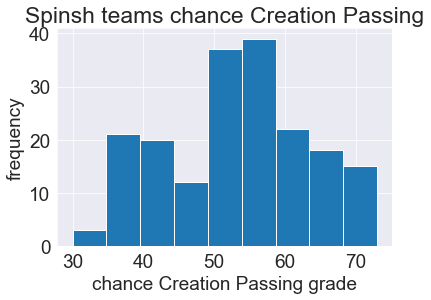

In [61]:
plt.figure(figsize=(6,6), dpi= 180) 
fig, ax = plt.subplots();
spanish_att_df.chanceCreationPassing.hist(bins=9);
ax.set_title("Spinsh teams chance Creation Passing")
ax.set_ylabel('frequency')
ax.set_xlabel('chance Creation Passing grade');

<Figure size 1080x1080 with 0 Axes>

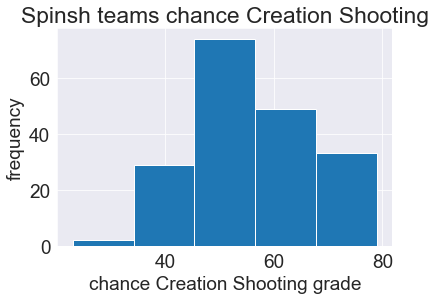

In [62]:
plt.figure(figsize=(6,6), dpi= 180) 
fig, ax = plt.subplots();
spanish_att_df.chanceCreationShooting.hist(bins=5);
ax.set_title("Spinsh teams chance Creation Shooting")
ax.set_ylabel('frequency')
ax.set_xlabel('chance Creation Shooting grade');

### from the three charts above it's clear that this attribute very strong attributes   

### Well, let's explore the defensive attributes of the teams

In [63]:


spanish_att_df.defenceTeamWidth

0      60
1      54
2      59
3      59
4      59
       ..
182    67
183    57
184    57
185    57
186    57
Name: defenceTeamWidth, Length: 187, dtype: int64

<Figure size 1080x1080 with 0 Axes>

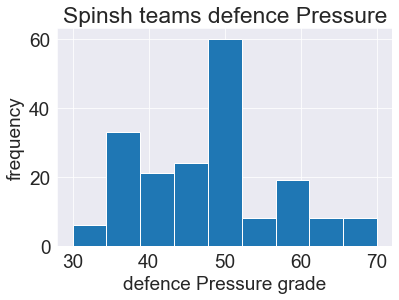

In [64]:
plt.figure(figsize=(6,6), dpi= 180) 
fig, ax = plt.subplots();
spanish_att_df.defencePressure.hist(bins=9);
ax.set_title("Spinsh teams defence Pressure")
ax.set_ylabel('frequency')
ax.set_xlabel('defence Pressure grade');

<Figure size 1080x1080 with 0 Axes>

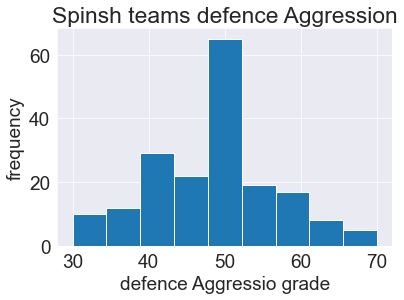

In [65]:
plt.figure(figsize=(6,6), dpi= 180) 
fig, ax = plt.subplots();
spanish_att_df.defenceAggression.hist(bins=9);
ax.set_title("Spinsh teams defence Aggression")
ax.set_ylabel('frequency')
ax.set_xlabel('defence Aggressio grade');

<Figure size 1080x1080 with 0 Axes>

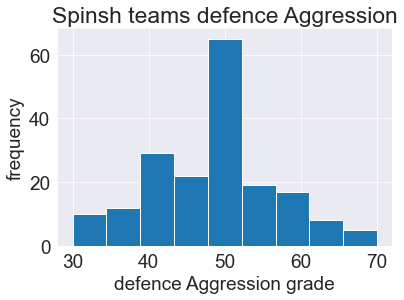

In [66]:
plt.figure(figsize=(6,6), dpi= 180) 
fig, ax = plt.subplots();
spanish_att_df.defenceAggression.hist(bins=9);
ax.set_title("Spinsh teams defence Aggression")
ax.set_ylabel('frequency')
ax.set_xlabel('defence Aggression grade');

### it's clear that the grades for defense are less than offensive ones  which represent the offensive style of the Spanish league

## let's find out the top strong Spanish teams

###  grouping by team name all his numeric attributes and sum them


In [67]:
total_df=spanish_att_df.groupby("team_long_name")[ spanish_numric_att_list].sum()
total_df.head(1)
 

buildUpPlaySpeed  buildUpPlayPassing  \
team_long_name                                                  
Athletic Club de Bilbao               310                 288   

                         chanceCreationPassing  chanceCreationCrossing  \
team_long_name                                                           
Athletic Club de Bilbao                    280                     421   

                         chanceCreationShooting  defencePressure  \
team_long_name                                                     
Athletic Club de Bilbao                     281              238   

                         defenceAggression  defenceTeamWidth  
team_long_name                                                
Athletic Club de Bilbao                374               341

### total of all summation of attributes sorted descendingly

In [68]:

total_df["sum"] =total_df.sum(axis=1)
total_df["sum"]
#total_df["sum"].sort_values(ascending= False)

team_long_name
Athletic Club de Bilbao      2533
Atlético Madrid              2624
CA Osasuna                   2560
CD Numancia                  2403
CD Tenerife                  1672
Córdoba CF                   2174
Elche CF                     2485
FC Barcelona                 2320
Getafe CF                    2189
Granada CF                   2221
Hércules Club de Fútbol      2100
Levante UD                   2515
Málaga CF                    2499
RC Celta de Vigo             2479
RC Deportivo de La Coruña    2392
RC Recreativo                2190
RCD Espanyol                 2422
RCD Mallorca                 2513
Racing Santander             2168
Rayo Vallecano               2356
Real Betis Balompié          2464
Real Madrid CF               2684
Real Sociedad                2398
Real Sporting de Gijón       2591
Real Valladolid              2494
Real Zaragoza                2240
SD Eibar                      857
Sevilla FC                   2646
UD Almería                   2505

### top ten  Spanish teams 

In [69]:
TOp_TEN =total_df["sum"].sort_values(ascending= False).head(10)
TOp_TEN 

team_long_name
Real Madrid CF             2684
Sevilla FC                 2646
Atlético Madrid            2624
Real Sporting de Gijón     2591
CA Osasuna                 2560
Athletic Club de Bilbao    2533
Levante UD                 2515
RCD Mallorca               2513
UD Almería                 2505
Málaga CF                  2499
Name: sum, dtype: int64

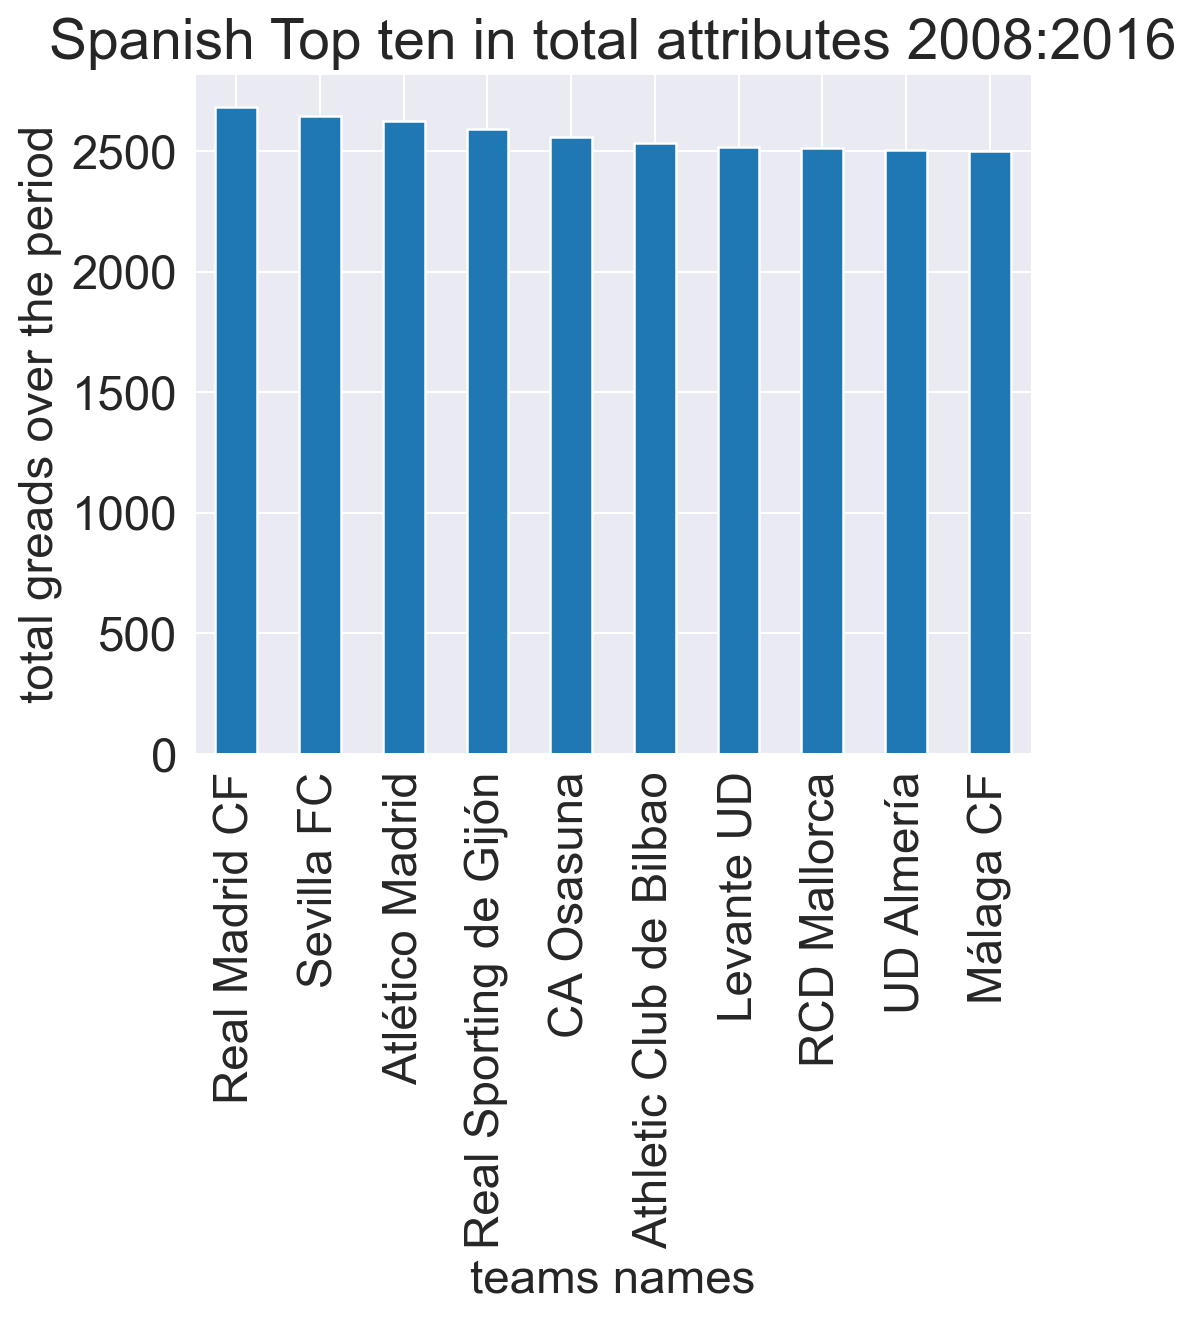

In [70]:
plt.rcParams.update({'font.size': 19})

plt.figure(figsize=(15,12), dpi= 180) 
TOp_TEN .plot(kind='bar', title='Spanish Top ten in total attributes 2008:2016', ylabel='total greads over the period',
         xlabel='teams names', figsize=(6, 5));



### Something is wrong here where FC Barcelona 3-time champion  from 2008 to 2016 

In [72]:
total_df["sum"].sort_values(ascending= False).head(21)

team_long_name
Real Madrid CF               2684
Sevilla FC                   2646
Atlético Madrid              2624
Real Sporting de Gijón       2591
CA Osasuna                   2560
Athletic Club de Bilbao      2533
Levante UD                   2515
RCD Mallorca                 2513
UD Almería                   2505
Málaga CF                    2499
Real Valladolid              2494
Elche CF                     2485
RC Celta de Vigo             2479
Real Betis Balompié          2464
RCD Espanyol                 2422
CD Numancia                  2403
Real Sociedad                2398
RC Deportivo de La Coruña    2392
UD Las Palmas                2364
Rayo Vallecano               2356
FC Barcelona                 2320
Name: sum, dtype: int64

## The result is not even near to the fact that FC Barcelona is the champion of three-time in the exact period so let's modify our range to focus on the attributes relate to any strong team the offensive part and the strength of the formation   attacks and shooting  :-

### * chanceCreationShooting 
### * chanceCreationPassing 
### * buildUpPlaySpeed 
### * buildUpPlayPassing 

In [73]:

spanish_numric_att_limit_list = ["buildUpPlaySpeed","buildUpPlayPassing","chanceCreationPassing","chanceCreationShooting"]
limted_total_df=spanish_att_df.groupby("team_long_name")[ spanish_numric_att_limit_list].sum()
limted_total_df


buildUpPlaySpeed  buildUpPlayPassing  \
team_long_name                                                    
Athletic Club de Bilbao                 310                 288   
Atlético Madrid                         319                 287   
CA Osasuna                              238                 297   
CD Numancia                             302                 273   
CD Tenerife                             198                 195   
Córdoba CF                              242                 278   
Elche CF                                289                 332   
FC Barcelona                            215                 204   
Getafe CF                               207                 238   
Granada CF                              262                 222   
Hércules Club de Fútbol                 253                 247   
Levante UD                              327                 340   
Málaga CF                               291                 253   
RC Celta de Vigo                        292                 298   
RC Deportivo de La Coruña               307                 257   
RC Recreativo                           255                 303   
RCD Espanyol                            319                 271   
RCD Mallorca                            337                 320   
Racing Santander                        236                 246   
Rayo Vallecano                          253                 261   
Real Betis Balompié                     314                 244   
Real Madrid CF                          304                 232   
Real Sociedad                           241                 231   
Real Sporting de Gijón                  354                 287   
Real Valladolid                         317                 322   
Real Zaragoza                           235                 201   
SD Eibar                                124                 104   
Sevilla FC                              342                 336   
UD Almería                              300                 363   
UD Las Palmas                           276                 262   
Valencia CF                             176                 210   
Villarreal CF                           233                 194   
Xerez Club Deportivo                    190                 176   

                           chanceCreationPassing  chanceCreationShooting  
team_long_name                                                            
Athletic Club de Bilbao                      280                     281  
Atlético Madrid                              388                     360  
CA Osasuna                                   321                     339  
CD Numancia                                  304                     336  
CD Tenerife                                  225                     233  
Córdoba CF                                   250                     307  
Elche CF                                     309                     344  
FC Barcelona                                 271                     318  
Getafe CF                                    302                     332  
Granada CF                                   326                     262  
Hércules Club de Fútbol                      283                     309  
Levante UD                                   350                     349  
Málaga CF                                    348                     331  
RC Celta de Vigo                             316                     336  
RC Deportivo de La Coruña                    239                     385  
RC Recreativo                                268                     220  
RCD Espanyol                                 350                     284  
RCD Mallorca                                 317                     315  
Racing Santander                             318                     257  
Rayo Vallecano                               255                     319  
Real Betis Balompié            

### total of all summation of limet list of attributes sorted descendingly

In [74]:
limted_total_df["sum"] =limted_total_df.sum(axis=1)

limted_total_df["sum"].sort_values(ascending= False)

team_long_name
Levante UD                   1366
Real Madrid CF               1355
Atlético Madrid              1354
Real Sporting de Gijón       1344
Sevilla FC                   1343
UD Almería                   1292
RCD Mallorca                 1289
Elche CF                     1274
Real Valladolid              1243
RC Celta de Vigo             1242
Real Betis Balompié          1231
RCD Espanyol                 1224
Málaga CF                    1223
CD Numancia                  1215
UD Las Palmas                1203
CA Osasuna                   1195
RC Deportivo de La Coruña    1188
Real Sociedad                1169
Athletic Club de Bilbao      1159
Hércules Club de Fútbol      1092
Rayo Vallecano               1088
Real Zaragoza                1083
Getafe CF                    1079
Córdoba CF                   1077
Granada CF                   1072
Villarreal CF                1069
Racing Santander             1057
RC Recreativo                1046
FC Barcelona                 1008

### top ten Spanish teams for most important attributes related to offensive style in playing soccer (football)

In [75]:
TOp_limt_TEN =limted_total_df["sum"].sort_values(ascending= False).head(10)
TOp_limt_TEN

team_long_name
Levante UD                1366
Real Madrid CF            1355
Atlético Madrid           1354
Real Sporting de Gijón    1344
Sevilla FC                1343
UD Almería                1292
RCD Mallorca              1289
Elche CF                  1274
Real Valladolid           1243
RC Celta de Vigo          1242
Name: sum, dtype: int64

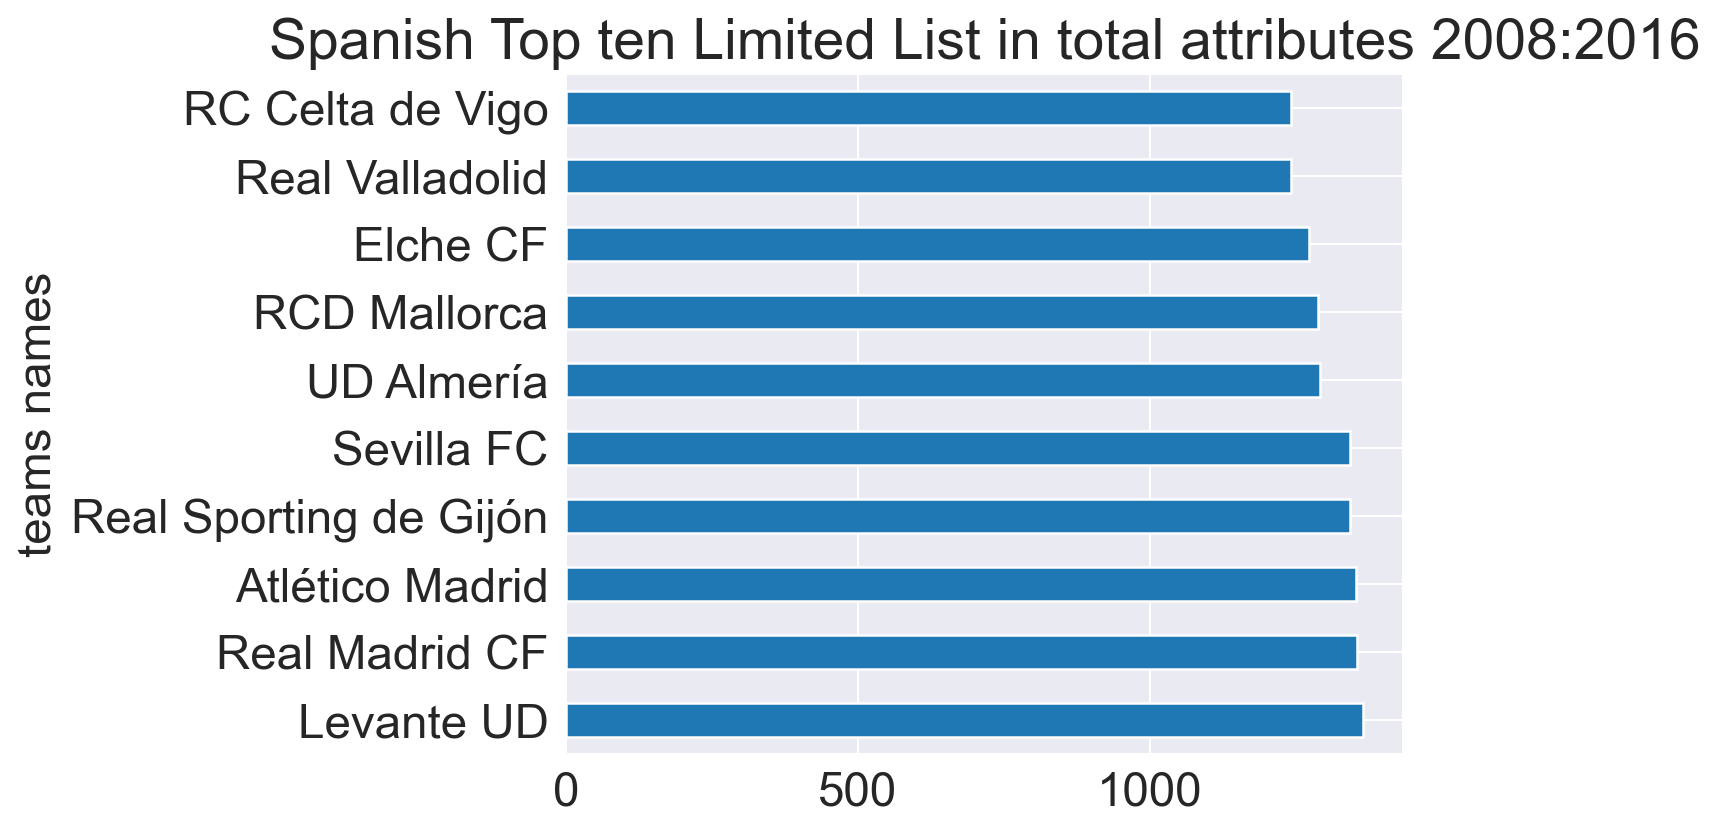

In [76]:
plt.rcParams.update({'font.size': 19})

plt.figure(figsize=(15,12), dpi= 180) 
TOp_limt_TEN.plot(kind='barh', title='Spanish Top ten Limited List in total attributes 2008:2016', ylabel='total greads over the period',
         xlabel='teams names', figsize=(6, 5));



### No trace of Barcelona in the top ten agian !!!

In [77]:
limted_total_df["sum"].sort_values(ascending= False).head(29)

team_long_name
Levante UD                   1366
Real Madrid CF               1355
Atlético Madrid              1354
Real Sporting de Gijón       1344
Sevilla FC                   1343
UD Almería                   1292
RCD Mallorca                 1289
Elche CF                     1274
Real Valladolid              1243
RC Celta de Vigo             1242
Real Betis Balompié          1231
RCD Espanyol                 1224
Málaga CF                    1223
CD Numancia                  1215
UD Las Palmas                1203
CA Osasuna                   1195
RC Deportivo de La Coruña    1188
Real Sociedad                1169
Athletic Club de Bilbao      1159
Hércules Club de Fútbol      1092
Rayo Vallecano               1088
Real Zaragoza                1083
Getafe CF                    1079
Córdoba CF                   1077
Granada CF                   1072
Villarreal CF                1069
Racing Santander             1057
RC Recreativo                1046
FC Barcelona                 1008

In [78]:
limted_total_df.describe()

buildUpPlaySpeed  buildUpPlayPassing  chanceCreationPassing  \
count         33.000000           33.000000              33.000000   
mean         268.424242          259.757576             301.303030   
std           53.680205           54.845254              58.592067   
min          124.000000          104.000000             119.000000   
25%          236.000000          231.000000             271.000000   
50%          276.000000          261.000000             309.000000   
75%          310.000000          297.000000             334.000000   
max          354.000000          363.000000             405.000000   

       chanceCreationShooting          sum  
count               33.000000    33.000000  
mean               311.333333  1140.818182  
std                 57.570971   187.168449  
min                116.000000   463.000000  
25%                299.000000  1072.000000  
50%                319.000000  1188.000000  
75%                341.000000  1243.000000  
max                414.000000  1366.000000

### so let's  extract  the mean  and median for the 4 atrributes
**buildUpPlaySpeed mean = 268 < median = 276   
buildUpPlayPassing mean = 260 < median = 261  
chanceCreationPassing mean = 301 < median = 309  
chanceCreationShooting mean = 311 < median = 319**
### from above we  have left  skew which in general the Spanish teams have strong grades in these attributes

### # total of all summation of selected as representative attributes


In [79]:
limted_total_df["sum"] =limted_total_df.sum(axis=1)
limted_total_sum_df=limted_total_df.iloc[ :,:].sort_values(by="sum",ascending= False)
limted_total_sum_df.head(29).style.bar()


## from  a glimpse to the result again even with limiting  our exploration to  the most related attributes still this result as a total or as attributes individually compared to the other teams is not even close to representing the actually, Barcelona results are almost near the median in most  

<a id='Q 3'></a>
##  Third Question

***

### we already dropped 17 col cause they had 40% null values  from Match DataFrame

#### select  the columns we interested to explore   from Match df


In [80]:
match_df=match_df.iloc[: , np.r_ [2:11 ]]

spanish_match_df = match_df[match_df["league_id"]==21518]
spanish_match_df.head(1) 

league_id     season  stage                 date  match_api_id  \
21517      21518  2008/2009      1  2008-08-30 00:00:00        530023   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  
21517             10267              8661               3               0

In [81]:
spanish_match_df.shape

(3040, 9)

In [82]:
spanish_match_df.isnull().values.any()

False

In [83]:
spanish_match_df.duplicated().sum()

0

### great no null or duplicated values

## creat sepreat  DataFrame copy for home   points


In [84]:
home_names_of_spanish_teams_df=names_of_spanish_teams_df.copy()


###  change name of team api_id to use it in mereg


In [85]:
home_names_of_spanish_teams_df.rename(columns={'team_api_id': 'home_team_api_id'}, inplace=True)
home_names_of_spanish_teams_df.head(1)

home_team_api_id team_long_name
251             10267    Valencia CF

###  calculate the point/s for home team  per match 
 

In [86]:
spanish_match_df.loc[:-2,"home_point"] = 0

spanish_match_df["home_point"]= np.select(condlist=[spanish_match_df["home_team_goal"] > spanish_match_df["away_team_goal"],
                                         spanish_match_df["home_team_goal"] == spanish_match_df["away_team_goal"]],
                                                                                   choicelist=[3,1],default=0) 
spanish_match_df

league_id     season  stage                 date  match_api_id  \
21517      21518  2008/2009      1  2008-08-30 00:00:00        530023   
21518      21518  2008/2009      1  2008-08-31 00:00:00        530084   
21519      21518  2008/2009      1  2008-08-31 00:00:00        530085   
21520      21518  2008/2009      1  2008-08-31 00:00:00        530086   
21521      21518  2008/2009      1  2008-08-31 00:00:00        530087   
...          ...        ...    ...                  ...           ...   
24552      21518  2015/2016      9  2015-10-25 00:00:00       2030167   
24553      21518  2015/2016      9  2015-10-24 00:00:00       2030168   
24554      21518  2015/2016      9  2015-10-26 00:00:00       2030169   
24555      21518  2015/2016      9  2015-10-24 00:00:00       2030170   
24556      21518  2015/2016      9  2015-10-23 00:00:00       2030171   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
21517             10267              8661               3               0   
21518              8371             10205               1               1   
21519              9783              8633               2               1   
21520              8388              8634               1               0   
21521              8696              8302               1               1   
...                 ...               ...             ...             ...   
24552              9906             10267               2               1   
24553              9864              9783               2               0   
24554              8315              9869               3               0   
24555              7878              8603               1               1   
24556              8370              8558               3               0   

       home_point  
21517           3  
21518           1  
21519           3  
21520           3  
21521           1  
...           ...  
24552           3  
24553           3  
24554           3  
24555           1  
24556           3  

[3040 rows x 10 columns]

### select the columns relate to home to exploer                       


In [87]:
home_spanish_match_df = spanish_match_df.iloc[: , np.r_ [1,3,5,7,9 ]]   
home_spanish_match_df.head(1)

season                 date  home_team_api_id  home_team_goal  \
21517  2008/2009  2008-08-30 00:00:00             10267               3   

       home_point  
21517           3

### merge "inner join" for home Results 


In [88]:
result_home_spanish_df =home_names_of_spanish_teams_df.merge(home_spanish_match_df, on="home_team_api_id")
# parssing the date
result_home_spanish_df["date"]= pd.to_datetime(result_home_spanish_df["date"])


In [89]:
spanish_match_df.head(2)

league_id     season  stage                 date  match_api_id  \
21517      21518  2008/2009      1  2008-08-30 00:00:00        530023   
21518      21518  2008/2009      1  2008-08-31 00:00:00        530084   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
21517             10267              8661               3               0   
21518              8371             10205               1               1   

       home_point  
21517           3  
21518           1

###  Let's calculate the home and away goals for each season

In [90]:
goals_per_season =spanish_match_df.groupby("season")[ ["home_team_goal","away_team_goal"]].sum()

In [91]:
goals_per_season

home_team_goal  away_team_goal
season                                   
2008/2009             631             470
2009/2010             608             423
2010/2011             622             420
2011/2012             638             412
2012/2013             641             450
2013/2014             620             425
2014/2015             584             425
2015/2016             615             428

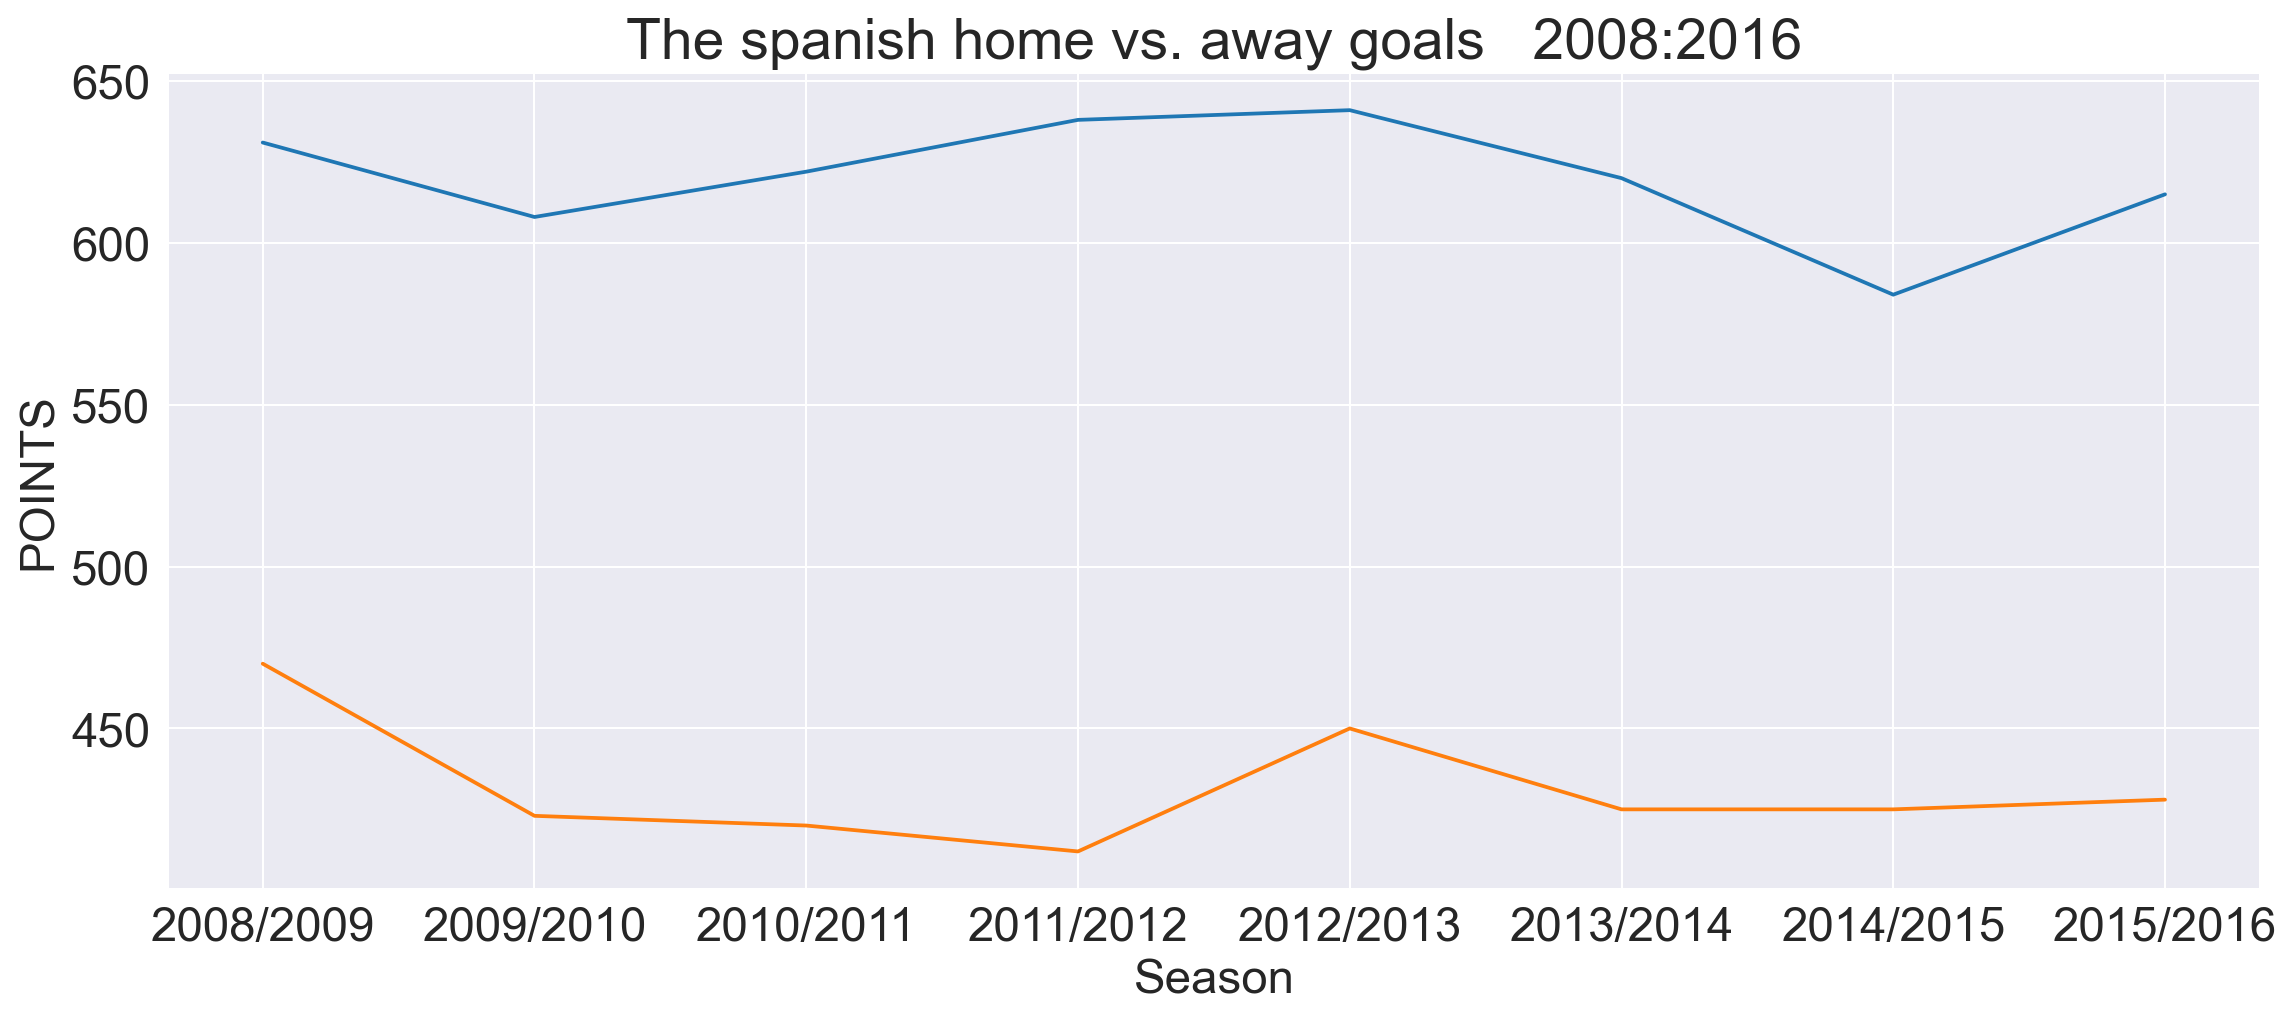

In [92]:
fig, ax = plt.subplots(figsize=(15,6), dpi= 180)
goals_per_season["home_team_goal"].plot(ax=ax)
goals_per_season["away_team_goal"].plot(ax=ax) 
plt.title("The spanish home vs. away goals   2008:2016")
plt.xlabel("Season")
plt.ylabel("POINTS")
plt.show()



In [93]:
result_home_spanish_df.head(2)

home_team_api_id team_long_name     season       date  home_team_goal  \
0             10267    Valencia CF  2008/2009 2008-08-30               3   
1             10267    Valencia CF  2008/2009 2008-11-15               2   

   home_point  
0           3  
1           0

### let's calulate the home  golas for each team  from2008:2016

In [94]:
goals_home_per_teams =result_home_spanish_df.groupby("team_long_name")["home_team_goal"].sum().sort_values(ascending= False).head(10)

In [95]:
goals_home_per_teams

team_long_name
Real Madrid CF             505
FC Barcelona               495
Atlético Madrid            321
Valencia CF                299
Sevilla FC                 285
Athletic Club de Bilbao    250
Málaga CF                  222
Villarreal CF              218
RCD Espanyol               205
Getafe CF                  202
Name: home_team_goal, dtype: int64

In [96]:
goals_home_per_teams.describe()

count     10.000000
mean     300.200000
std      112.868458
min      202.000000
25%      219.000000
50%      267.500000
75%      315.500000
max      505.000000
Name: home_team_goal, dtype: float64

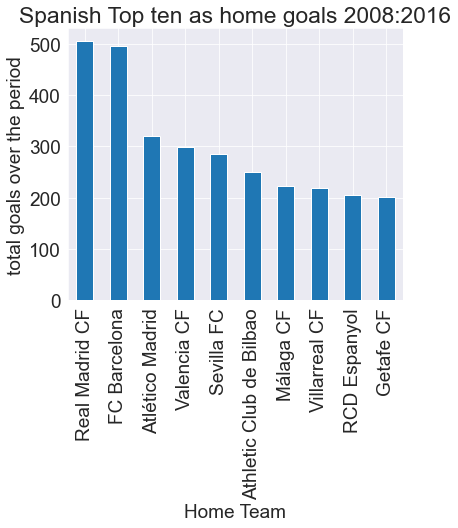

In [97]:
title_s ='Spanish Top ten as home goals 2008:2016'
ylab = 'total goals over the period'

goals_home_per_teams.plot(kind='bar', title =title_s, ylabel= ylab,xlabel='Home Team', figsize=(6, 5));

 ### we notice Atlético Madrid  in third place but far away from big 2

### The list of top 10 in Spanish league from 2008:20016 according home point

In [98]:
#top ten team home  points 

Hr = result_home_spanish_df.groupby(["team_long_name"])["home_point"].sum().sort_values(ascending= False )#.unstack().plot(kind="bar") 
Hr.iloc[:11]


team_long_name
FC Barcelona               405
Real Madrid CF             398
Atlético Madrid            333
Valencia CF                304
Sevilla FC                 300
Athletic Club de Bilbao    271
Villarreal CF              261
Málaga CF                  241
RCD Espanyol               241
Getafe CF                  225
Real Sociedad              200
Name: home_point, dtype: int32

In [99]:
Hr.describe()

count     33.000000
mean     156.333333
std      112.506574
min        9.000000
25%       47.000000
50%      133.000000
75%      241.000000
max      405.000000
Name: home_point, dtype: float64

from describe() we notice ateam have only 9 points at home in 8 sessions 

In [100]:
Hr_di = result_home_spanish_df.groupby(["team_long_name"])["home_point"].sum().sort_values(ascending= False )
Hr_di.iloc[-1:]

team_long_name
Córdoba CF    9
Name: home_point, dtype: int32

### it's hard to believe that the last team point for 8 sessions in his home only  9 points!!!!    Córdoba CF    9

<AxesSubplot:title={'center':'Spanish Top ten as home points 2008:2016'}, xlabel='Home Team', ylabel='total points over the period'>

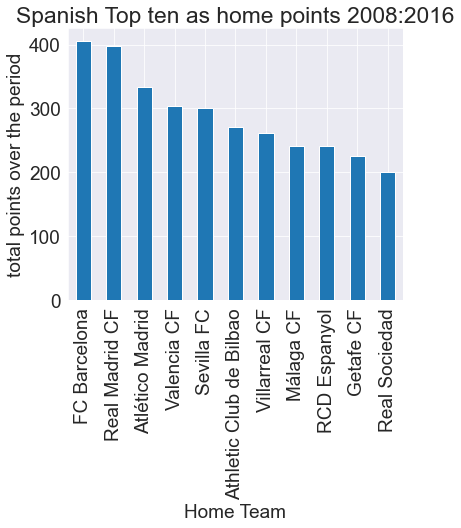

In [101]:
Hr_di=Hr_di.iloc[:11].sort_values(ascending= False ); 

title_s ='Spanish Top ten as home points 2008:2016'
ylab = 'total points over the period'

Hr_di.plot(kind='bar', title =title_s, ylabel= ylab,xlabel='Home Team', figsize=(6, 5))

 ### we notice Atlético Madrid  in third place  agian ! 

## creat sepreat  DataFrame copy for away points

#### creat sepreat copy for away name

In [102]:
away_names_of_spanish_teams_df =names_of_spanish_teams_df.copy()

#### change name of team api_id to use it in mereg

In [103]:
away_names_of_spanish_teams_df.rename(columns={'team_api_id': 'away_team_api_id'}, inplace=True)
away_names_of_spanish_teams_df.head(1)

away_team_api_id team_long_name
251             10267    Valencia CF

### calculate the point/s for away team  per match 

In [104]:
spanish_match_df.loc[:-2,"away_point"] = 0
spanish_match_df["away_point"]= np.select(condlist=[spanish_match_df["home_team_goal"] < spanish_match_df["away_team_goal"],
                                         spanish_match_df["home_team_goal"] == spanish_match_df["away_team_goal"]],choicelist=[3,1],default=0) 


### select the columns relate to away to exploer 

In [105]:
away_spanish_match_df = spanish_match_df.iloc[: , np.r_ [1,3,6,8,10 ]]
away_spanish_match_df.head(1)

season                 date  away_team_api_id  away_team_goal  \
21517  2008/2009  2008-08-30 00:00:00              8661               0   

       away_point  
21517           0

### merge "inner join" for away Results

In [106]:
 result_away_spanish_df = away_names_of_spanish_teams_df.merge(away_spanish_match_df, on="away_team_api_id")
# parssing the date
result_away_spanish_df["date"]= pd.to_datetime(result_away_spanish_df["date"])


### calculate the total points fro all teams in the period from 2008:2016

In [107]:
Ar=result_away_spanish_df.groupby(["team_long_name"] )["away_point"].sum().sort_values(ascending= False) 


### top ten teams according to  points away

<AxesSubplot:title={'center':'Spanish Top ten as away points 2008:2016'}, xlabel='away Team', ylabel='total points over the period'>

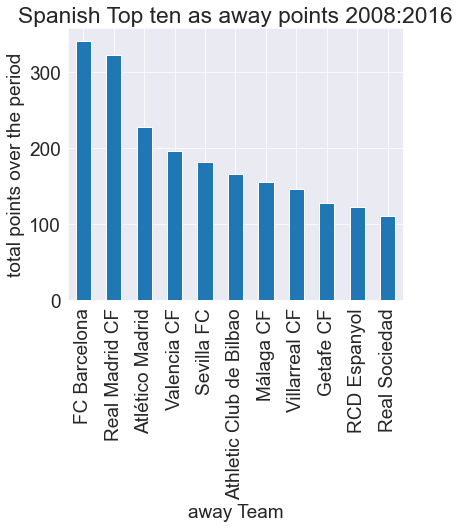

In [108]:
Ar =Ar.iloc[:11].sort_values(ascending= False ); 

title_s ='Spanish Top ten as away points 2008:2016'
ylab = 'total points over the period'

Ar.plot(kind='bar', title =title_s, ylabel= ylab,xlabel='away Team', figsize=(6, 5))

### top ten teams according to  goals away
 ### and Atlético Madrid  in third place  agian ! 

In [109]:
goals_away_per_teams=result_away_spanish_df.groupby(["team_long_name"] )["away_team_goal"].sum().sort_values(ascending= False) 
goals_away_per_teams= goals_away_per_teams.iloc[:11].sort_values(ascending= False );

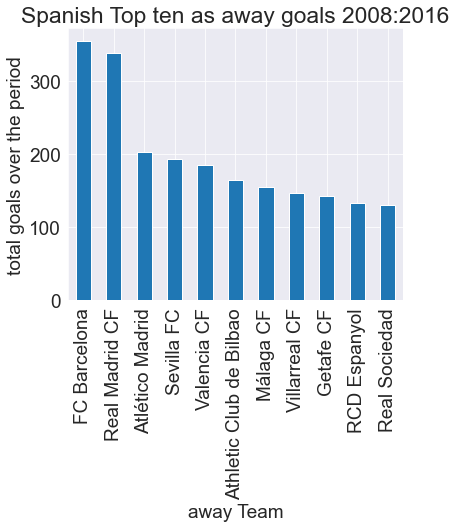

In [110]:
title_s ='Spanish Top ten as away goals 2008:2016'
ylab = 'total goals over the period'

goals_away_per_teams.plot(kind='bar', title =title_s, ylabel= ylab,xlabel='away Team', figsize=(6, 5));

 ### definitely something desiver to investigate in depith hear .  we notice Atlético Madrid in third place agian ! as pattern but have alook to stats  

In [111]:
Ar.describe()

count     11.000000
mean     190.545455
std       77.266246
min      111.000000
25%      137.000000
50%      166.000000
75%      211.500000
max      340.000000
Name: away_point, dtype: float64

### wow, we notice a team has only 5 points  for 8 S away 
### we wonder who is it?

In [112]:
goals_away_per_teams.describe()

count     11.000000
mean     195.000000
std       78.467828
min      130.000000
25%      144.500000
50%      165.000000
75%      198.000000
max      354.000000
Name: away_team_goal, dtype: float64

In [113]:
Ar=result_away_spanish_df.groupby(["team_long_name"] )["away_point"].sum().sort_values(ascending= True) 
Ar.iloc[:1]

team_long_name
CD Numancia    5
Name: away_point, dtype: int32

### CD Numancia    5


##    lets investigate  the  top three Spanish teams

In [114]:
top_three = ["Atlético Madrid","Real Madrid CF", "FC Barcelona"]
 # select only the 3 teams results from home  goal & point 
home_top_3 =result_home_spanish_df.query(f'team_long_name in {top_three}') 
home_top_3.head(1)


home_team_api_id  team_long_name     season       date  home_team_goal  \
608              8633  Real Madrid CF  2008/2009 2008-11-08               4   

     home_point  
608           3

### summiton of the home points  grouping by season then name for each team 

In [115]:

Hr_home_top_3 = home_top_3.groupby(["season","team_long_name"])["home_point"].sum() 
Hr_home_top_3

season     team_long_name 
2008/2009  Atlético Madrid    40
           FC Barcelona       45
           Real Madrid CF     44
2009/2010  Atlético Madrid    36
           FC Barcelona       55
           Real Madrid CF     54
2010/2011  Atlético Madrid    33
           FC Barcelona       50
           Real Madrid CF     49
2011/2012  Atlético Madrid    38
           FC Barcelona       52
           Real Madrid CF     50
2012/2013  Atlético Madrid    44
           FC Barcelona       55
           Real Madrid CF     53
2013/2014  Atlético Madrid    49
           FC Barcelona       50
           Real Madrid CF     49
2014/2015  Atlético Madrid    45
           FC Barcelona       49
           Real Madrid CF     50
2015/2016  Atlético Madrid    48
           FC Barcelona       49
           Real Madrid CF     49
Name: home_point, dtype: int32

### select only the 3 teams results from away  goal & point 

In [116]:
top_three = ["Atlético Madrid","Real Madrid CF", "FC Barcelona"]

 
away_top_3 =result_away_spanish_df.query(f'team_long_name in {top_three}') 
away_top_3.head(1)


away_team_api_id  team_long_name     season       date  away_team_goal  \
608              8633  Real Madrid CF  2008/2009 2008-08-31               1   

     away_point  
608           0

### sum  of the away  points  per season then name of each team 


In [117]:

Ar_away_top_3 = away_top_3.groupby(["season","team_long_name"])["away_point"].sum()
Ar_away_top_3

season     team_long_name 
2008/2009  Atlético Madrid    27
           FC Barcelona       42
           Real Madrid CF     34
2009/2010  Atlético Madrid    11
           FC Barcelona       44
           Real Madrid CF     42
2010/2011  Atlético Madrid    25
           FC Barcelona       46
           Real Madrid CF     43
2011/2012  Atlético Madrid    18
           FC Barcelona       39
           Real Madrid CF     50
2012/2013  Atlético Madrid    32
           FC Barcelona       45
           Real Madrid CF     32
2013/2014  Atlético Madrid    41
           FC Barcelona       37
           Real Madrid CF     38
2014/2015  Atlético Madrid    33
           FC Barcelona       45
           Real Madrid CF     42
2015/2016  Atlético Madrid    40
           FC Barcelona       42
           Real Madrid CF     41
Name: away_point, dtype: int32

In [118]:
total_home_top_3 = home_top_3.iloc[: , np.r_ [1,2,3,5 ]]
total_home_top_3_1=total_home_top_3.rename({'home_point': 'points'}, axis=1)


total_away_top_3 =away_top_3.iloc[: , np.r_ [1,2,3,5 ]] 
total_away_top_3_2 =total_away_top_3.rename({'away_point': 'points'}, axis=1)


### concat the two df hom and away for top three 

In [119]:
# concat the two df hom and away for top three 
total_top_3_all =pd.concat([total_home_top_3_1, total_away_top_3_2], axis=0)

In [120]:
total_top_3_all 

team_long_name     season       date  points
608    Real Madrid CF  2008/2009 2008-11-08       3
609    Real Madrid CF  2008/2009 2008-11-22       3
610    Real Madrid CF  2008/2009 2008-12-07       0
611    Real Madrid CF  2008/2009 2008-12-20       3
612    Real Madrid CF  2008/2009 2009-01-04       3
...               ...        ...        ...     ...
2142  Atlético Madrid  2015/2016 2016-04-20       3
2143  Atlético Madrid  2015/2016 2016-05-08       0
2144  Atlético Madrid  2015/2016 2015-09-19       3
2145  Atlético Madrid  2015/2016 2015-09-26       0
2146  Atlético Madrid  2015/2016 2015-10-18       3

[912 rows x 4 columns]

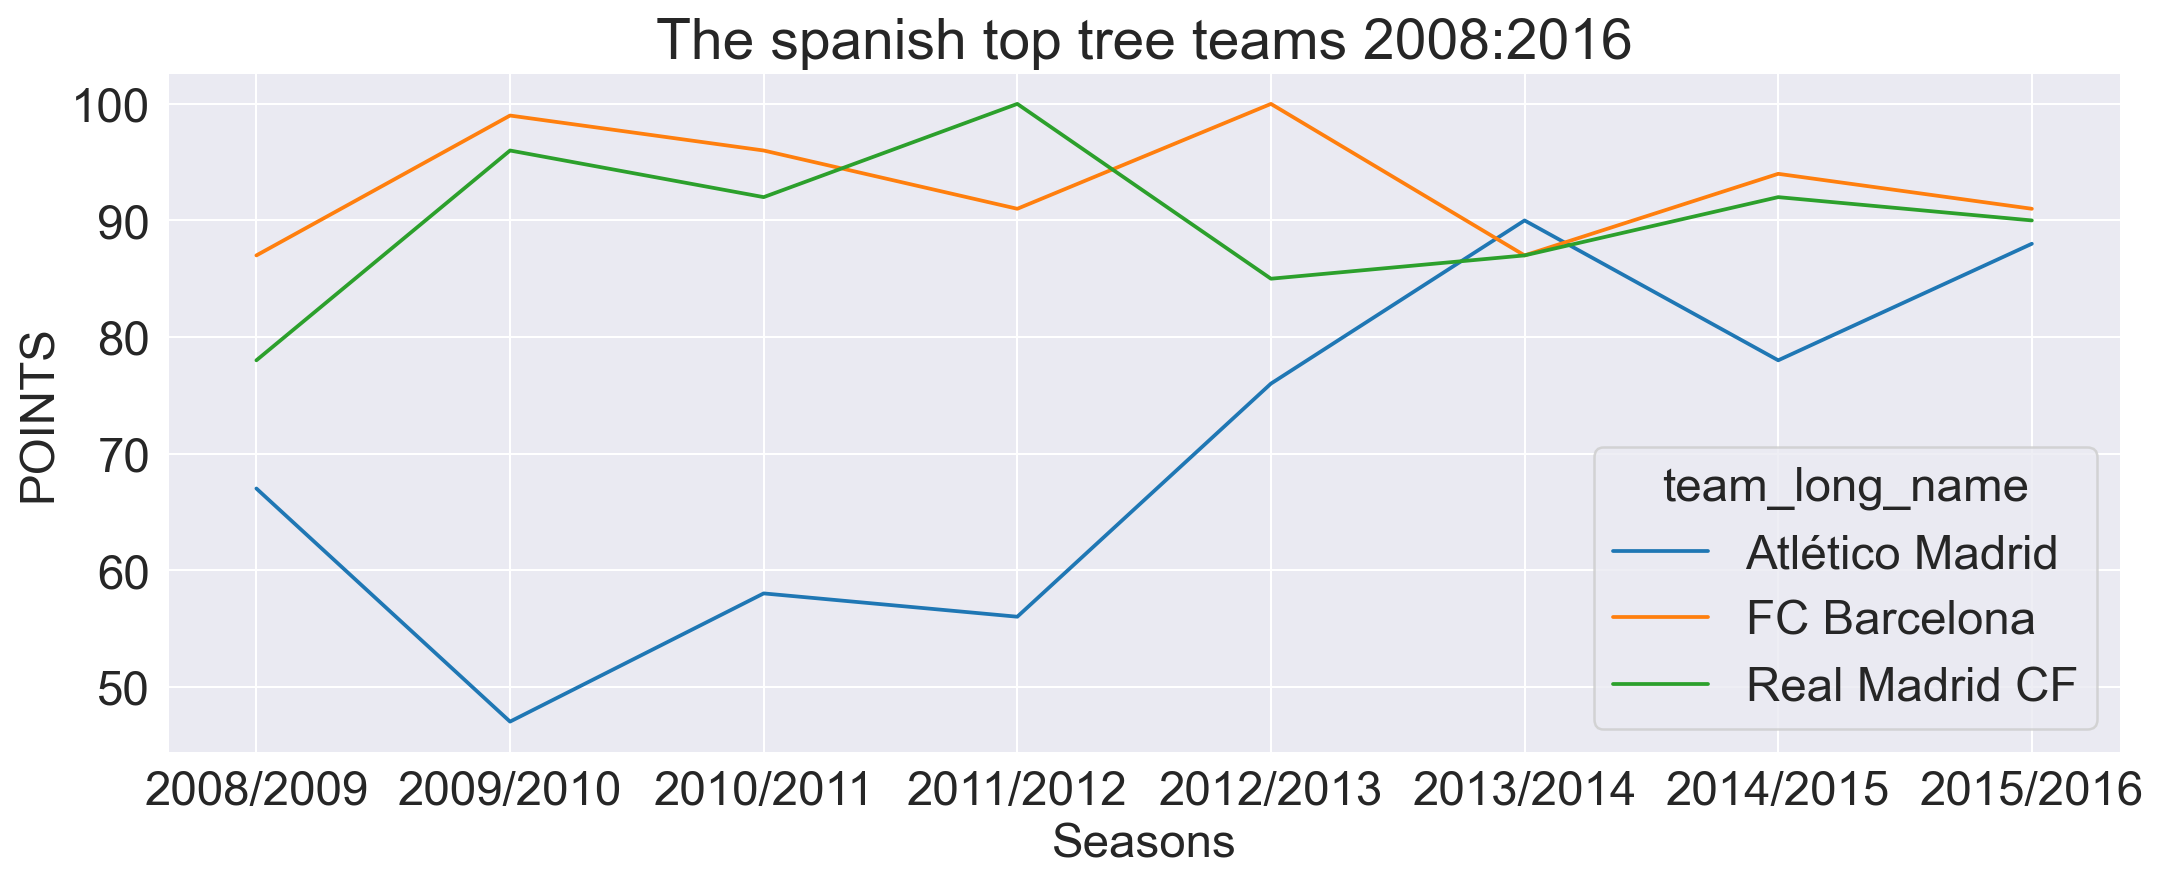

<Figure size 432x288 with 0 Axes>

In [121]:
fig, ax = plt.subplots(figsize=(14,5), dpi= 180)
total_top_3_all.groupby(["season" ,"team_long_name" ])[ "points"].sum().unstack().plot(ax=ax)    
plt.title("The spanish top tree teams 2008:2016")
plt.xlabel("Seasons")
plt.ylabel("POINTS")
plt.show()
plt.tight_layout();

***remarkable journey from the 9th in 2009 to the champion in 2013 
Atlético Madrid was the champion la Liga 2013/2014  	Atlético Madrid	90
FC Barcelona	87 Real Madrid CF	87
Atlético repeated his achievement again and won the championship but after 2016 which out analysis scope***

In [122]:
ttt_groubed=total_top_3_all.groupby(["team_long_name","season"])["points"].sum();


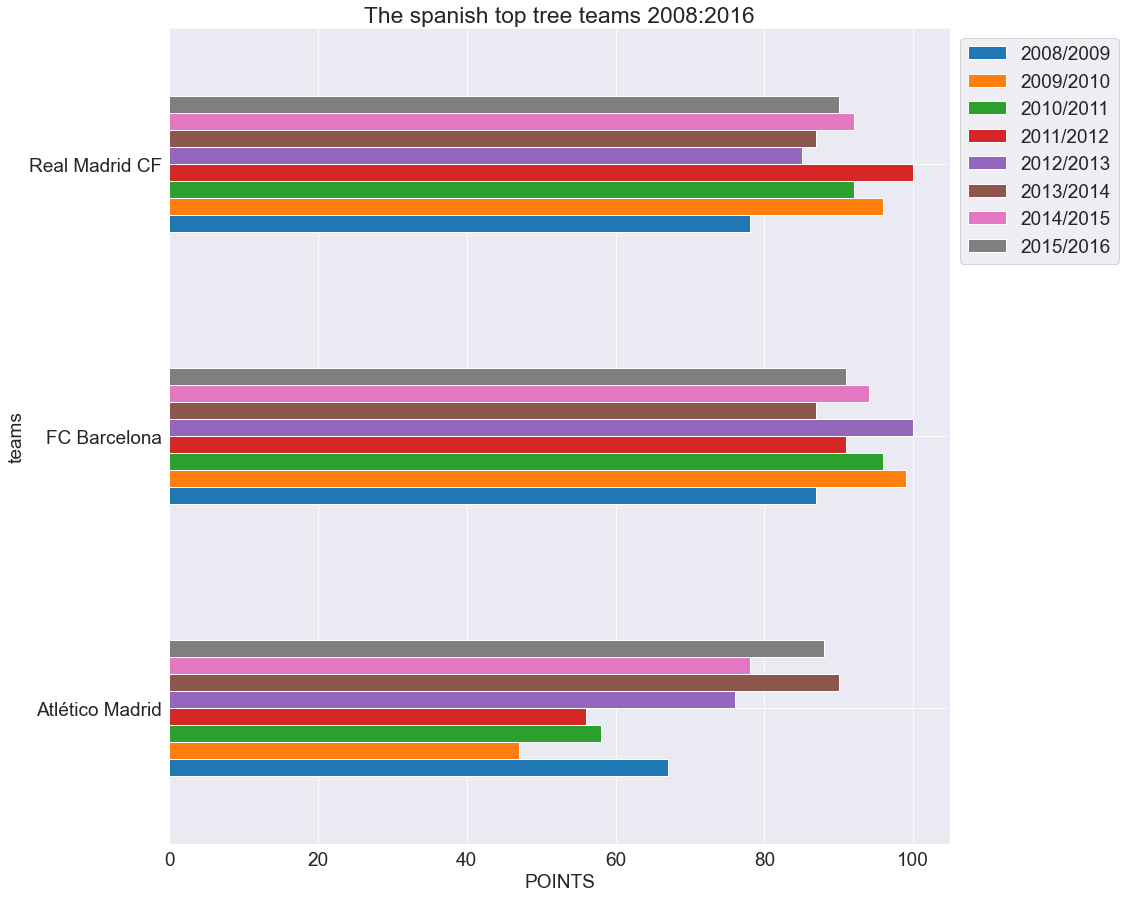

<Figure size 432x288 with 0 Axes>

In [123]:

plt.rcParams.update({'font.size': 19})

ax =ttt_groubed.unstack().plot(kind ="barh" , figsize=(14,15));
ax.legend(bbox_to_anchor=(1,1))
plt.title("The spanish top tree teams 2008:2016")
plt.ylabel("teams")
plt.xlabel("POINTS")
plt.show()
plt.tight_layout();

### From the bottom bar of each team representing 2008 to the upper one, we see an increase in Atlético points compared to Real Madrid and Barcelona

<a id='conclusions'></a>
## Conclusions

### **While tracing  Mohamed Salah's career in different clubs he played for, I witnessed a good rise in his performance in the period between 2012-2014. Then I found a decrease in his effort and then a greater rise within a short period, specifically the first months of 2015.  Salah’s achievement and results changed so much  during these periods, I found that the first period of rising was the period of his first professional career in Europe with the Swiss FC Basel, and it lasted for a year and a half, while the period of the greatest rise in his career during the years of research was the period of the first months of The year 2015, specifically between February and May 2015, was a period during which he loaned the English club, Chelsea, to Fiorentina.** 


### the Spanish league main characteristics  is an offensive style in chanceCreationShooting * chanceCreationPassing * buildUpPlaySpeed * buildUpPlayPassing as normal real Madrid shows a great grade  attributes but the  dataset   failed to represent the same situation with the champion Barcelona

### **in investagte the third Question we  face arepeted batterrn that It is clear to us that the claims that lack of competition in La Liga and constrained it only between the two big teams  Real Madrid and Barcelona are inaccurate and that Atlético de Madrid has won the league title once and with a very good performance since 2008: 2016 from the ninth. to the top three. Many times ** and It's a strange result to find out that CD Numancia is 5 points away and Córdoba CF only has 9 points!!!! In all eight seasons** 

  

### Limitations
* ### It was noticed while tracking the table of team attributes of the Spanish teams in both the total numerical attributes of the league champion Barcelona team, and even with the modification of the search and limiting it only to the distinctive attributes of the  top  teams,  I mean the offensive side and the formation of the attack, the results derived from the table did not match with the Barcelona team real results,I can't find the reason for the low grades for a champion 3 times in the exact period

 
 

* **Despite noting the improvement and decline in Salah's performance across different clubs and his very big improvement at Fiorentina, we couldn't figure out the reason for this improvement. This cannot be known by looking at this data.**



### for curiosity  i investigated the English league using the same table team attributes  the results are not consistent again with real results. top teams in the bottom !!  below is a print screen of the final  result

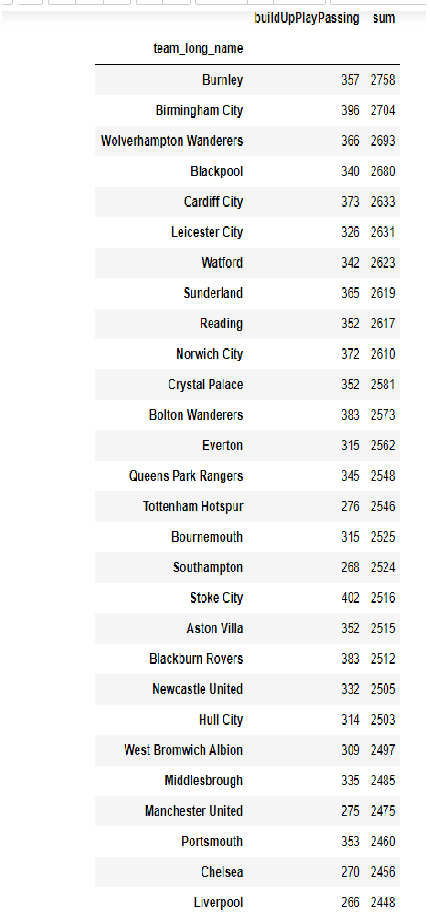

## acknowledges to 
 www.geeksforgeeks.org
 www.stackoverflow.com
 www.analyticsvidhya.com